In [1]:
import optimization as opt
import utils
import numpy as np
import pandas as pd
import re

In [2]:
from matplotlib import pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [3]:
train = pd.read_csv('toxic_train.csv')
test = pd.read_csv('toxic_test.csv')

In [4]:
train

Unnamed: 0                                       comment_text  is_toxic
0               0  Explanation\nWhy the edits made under my usern...     False
1               1  D'aww! He matches this background colour I'm s...     False
2               2  Hey man, I'm really not trying to edit war. It...     False
3               3  "\nMore\nI can't make any real suggestions on ...     False
4               4  You, sir, are my hero. Any chance you remember...     False
...           ...                                                ...       ...
52056      159494  "\n\n our previous conversation \n\nyou fuckin...      True
52057      159514                  YOU ARE A MISCHIEVIOUS PUBIC HAIR      True
52058      159541  Your absurd edits \n\nYour absurd edits on gre...      True
52059      159546  "\n\nHey listen don't you ever!!!! Delete my e...      True
52060      159554  and i'm going to keep posting the stuff u dele...      True

[52061 rows x 3 columns]

In [5]:
def process_string(string):
    token_lst = string.lower()
    token_lst = re.sub(r'[\W, _]', ' ', token_lst)
    #token_lst = re.split(r'\s+', token_lst)
   # if '' in token_lst:
       # token_lst.remove('')
    return token_lst

In [6]:
"asdasasdasd".isalnum()

True

In [7]:
X_train = train.apply(lambda row: process_string(row['comment_text']), axis=1)
X_test = test.apply(lambda row: process_string(row['comment_text']), axis=1)

In [4]:
y_train = train['is_toxic']
y_test = test['is_toxic']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer(min_df=0.001)

In [11]:
X_train = vectorizer.fit_transform(X_train.to_list())

In [12]:
X_test = vectorizer.transform(X_test.to_list())

In [13]:
len(vectorizer.get_feature_names())

3735

In [292]:
'fuck' in vectorizer.get_feature_names()

True

In [373]:
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.02, step_beta=0, tolerance=1e-5, l2_coef=1e-2)

In [16]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
fit_1 = np.ones(X_train.shape[0]).astype(int)
hstack([X_train , csr_matrix(fit_1).T]).shape

(52061, 3736)

In [17]:
fit_2 = np.ones(X_test.shape[0]).astype(int)

In [18]:
w = np.squeeze(np.array(((y_train.to_numpy() * X_train) / np.sqrt((X_train.multiply(X_train).sum(axis=0))))))
w.dot(w) ** 0.5

237.62669887650858

In [6]:
y_train = y_train.astype(int)
y_train[y_train == 0] = -1
y_test= y_test.astype(int)
y_test[y_test == 0] = -1

In [374]:
dic = gd.fit(X_train, y_train.to_numpy(), trace=True, valid=False)

In [375]:
a_pred = gd.predict(X_test)

In [376]:
(a_pred == y_test).mean()

0.8369607274134262

In [23]:
y_train[y_train == -1].sum()

-35836

In [24]:
b = np.sign(X_test.dot(gd.get_weights()))
(b==0).sum() / X_test.shape[0]

0.014461211065970207

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression(tol=1e-5, solver='saga', max_iter=1000)
model.fit(X_train, y_train)
a_pred = model.predict(X_test)
(a_pred == y_test).mean()

/home/alexandr/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.8368156316502224

In [27]:
(model.predict_proba(X_test).argmax(axis =1)- gd.predict_proba(X_test).argmax(axis =1)).mean()

0.0032888372992841944

In [28]:
(gd.predict_proba(X_test).argmax(axis =1)*2 - 1 == y_test).mean()

0.8412652350551364

In [29]:
a = gd.predict_proba(X_train)

In [62]:
dic_b_lst = []
for i in range(1, 25):
    gd = opt.GDClassifier('binary_logistic', step_beta=i/10, l2_coef=1e-2)
    dic_b_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, valid=True))

In [177]:
gd = opt.GDClassifier('binary_logistic', step_beta=0, l2_coef=1e-2)
dic_b_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, valid=True))

In [31]:
np.array(dic['time']).sum()

6.434480667114258

In [6]:
import matplotlib as mpl
import seaborn as sns

In [7]:
mpl.style.use('seaborn')

In [34]:
w =(np.random.rand(X_train.shape[1]) * 2 - 1)/(2*X_train.shape[1])
np.linalg.norm((w - np.zeros(X_train.shape[1])))

0.004791624663109395

In [327]:
round?

Signature: round(number, ndigits=None)
Docstring:
Round a number to a given precision in decimal digits.

The return value is an integer if ndigits is omitted or None.  Otherwise
the return value has the same type as the number.  ndigits may be negative.
Type:      builtin_function_or_method


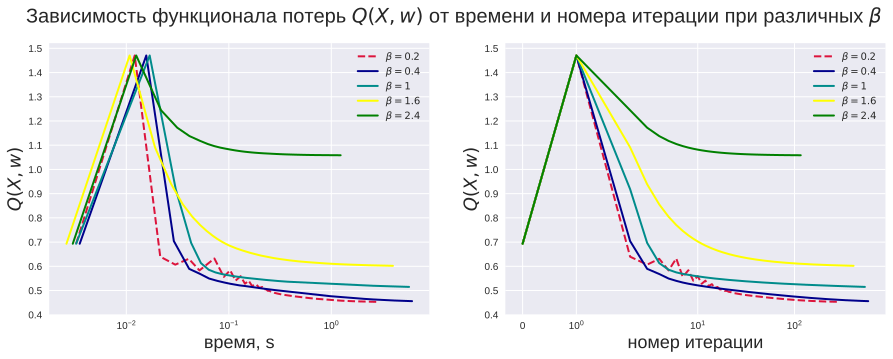

In [329]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость функционала потерь $Q(X, w)$ от времени и номера итерации при различных $\beta$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    #plt.plot(np.array(dic_b_lst[24]['time']).cumsum(), dic_b_lst[24]['func'], color='orange', linewidth=lw, label=r'$\beta=0$', alpha=0.5)
    plt.plot(np.array(dic_b_lst[1]['time']).cumsum(), dic_b_lst[1]['func'], linestyle='--', color='crimson', linewidth=lw, label=r'$\beta=0.2$')
    plt.plot(np.array(dic_b_lst[3]['time']).cumsum(), dic_b_lst[3]['func'], color='darkblue', linewidth=lw, label=r'$\beta=0.4$')
    plt.plot(np.array(dic_b_lst[9]['time']).cumsum(), dic_b_lst[9]['func'], color='darkcyan', linewidth=lw, label=r'$\beta=1$')
    plt.plot(np.array(dic_b_lst[15]['time']).cumsum(), dic_b_lst[15]['func'], color='yellow', linewidth=lw, label=r'$\beta=1.6$')
    plt.plot(np.array(dic_b_lst[23]['time']).cumsum(), dic_b_lst[23]['func'], color='green', linewidth=lw, label=r'$\beta=2.4$')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('log')
    plt.yticks([0.4 + i*0.1 for i in range(12)], [round(0.4 + i*0.1, 1) for i in range(12)])
    #plt.xticks([10**i for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    
    pos = np.arange(1, 11)
    lw = 2
    #plt.plot(np.arange(0, len(dic_b_lst[24]['func'])), dic_b_lst[24]['func'], color='orange', linewidth=lw, label=r'$\beta=0$', alpha=0.5)
    plt.plot(np.arange(0, len(dic_b_lst[1]['func'])), dic_b_lst[1]['func'], linestyle='--', color='crimson', linewidth=lw, label=r'$\beta=0.2$')
    plt.plot(np.arange(0, len(dic_b_lst[3]['func'])), dic_b_lst[3]['func'], color='darkblue', linewidth=lw, label=r'$\beta=0.4$')
    plt.plot(np.arange(0, len(dic_b_lst[9]['func'])), dic_b_lst[9]['func'], color='darkcyan', linewidth=lw, label=r'$\beta=1$')
    plt.plot(np.arange(0, len(dic_b_lst[15]['func'])), dic_b_lst[15]['func'], color='yellow', linewidth=lw, label=r'$\beta=1.6$')
    plt.plot(np.arange(0, len(dic_b_lst[23]['func'])), dic_b_lst[23]['func'], color='green', linewidth=lw, label=r'$\beta=2.4$')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.4 + i*0.1 for i in range(12)], [round(0.4 + i*0.1, 1) for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итерации", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('beta_func.pdf')

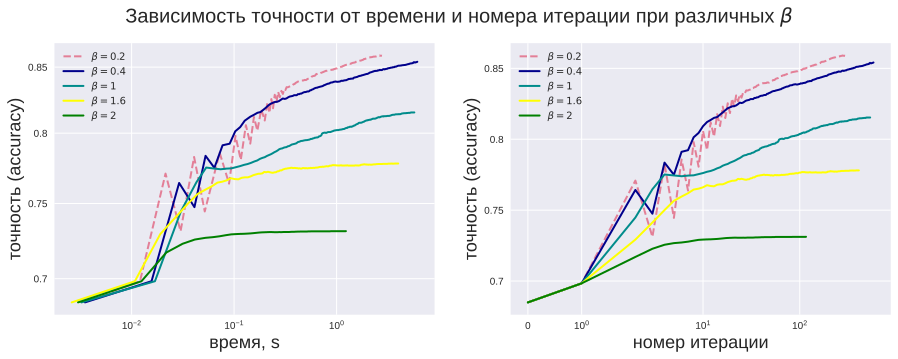

In [325]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость точности от времени и номера итерации при различных $\beta$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    #plt.plot(np.array(dic_b_lst[24]['time']).cumsum(), dic_b_lst[24]['accuracy'], color='orange', linewidth=lw, label=r'$\beta=0$', alpha=0.5)
    plt.plot(np.array(dic_b_lst[1]['time']).cumsum(), dic_b_lst[1]['accuracy'], linestyle='--', color='crimson', linewidth=lw, label=r'$\beta=0.2$', alpha=0.5)
    plt.plot(np.array(dic_b_lst[3]['time']).cumsum(), dic_b_lst[3]['accuracy'], color='darkblue', linewidth=lw, label=r'$\beta=0.4$')
    plt.plot(np.array(dic_b_lst[9]['time']).cumsum(), dic_b_lst[9]['accuracy'], color='darkcyan', linewidth=lw, label=r'$\beta=1$')
    plt.plot(np.array(dic_b_lst[15]['time']).cumsum(), dic_b_lst[15]['accuracy'], color='yellow', linewidth=lw, label=r'$\beta=1.6$')
    plt.plot(np.array(dic_b_lst[23]['time']).cumsum(), dic_b_lst[23]['accuracy'], color='green', linewidth=lw, label=r'$\beta=2$')

    #plt.grid()
    plt.yscale('log')
    plt.xscale('log')
    plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    #plt.plot(np.arange(0, len(dic_b_lst[24]['accuracy'])), dic_b_lst[24]['accuracy'], color='orange', linewidth=lw, label=r'$\beta=0$', alpha=0.5)
    plt.plot(np.arange(0, len(dic_b_lst[1]['accuracy'])), dic_b_lst[1]['accuracy'], linestyle='--', color='crimson', linewidth=lw, label=r'$\beta=0.2$',  alpha=0.5)
    plt.plot(np.arange(0, len(dic_b_lst[3]['accuracy'])), dic_b_lst[3]['accuracy'], color='darkblue', linewidth=lw, label=r'$\beta=0.4$')
    plt.plot(np.arange(0, len(dic_b_lst[9]['accuracy'])), dic_b_lst[9]['accuracy'], color='darkcyan', linewidth=lw, label=r'$\beta=1$')
    plt.plot(np.arange(0, len(dic_b_lst[15]['accuracy'])), dic_b_lst[15]['accuracy'], color='yellow', linewidth=lw, label=r'$\beta=1.6$')
    plt.plot(np.arange(0, len(dic_b_lst[23]['accuracy'])), dic_b_lst[23]['accuracy'], color='green', linewidth=lw, label=r'$\beta=2$')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итерации", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.savefig('beta_accuracy.pdf')

In [302]:
dic_a_lst = []
for i in range(1, 51):
    gd = opt.GDClassifier('binary_logistic', step_alpha=i/50, l2_coef=1e-2)
    dic_a_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, valid=True))

In [169]:
dic_a_lst[18]['func'][0]

0.6931471805599453

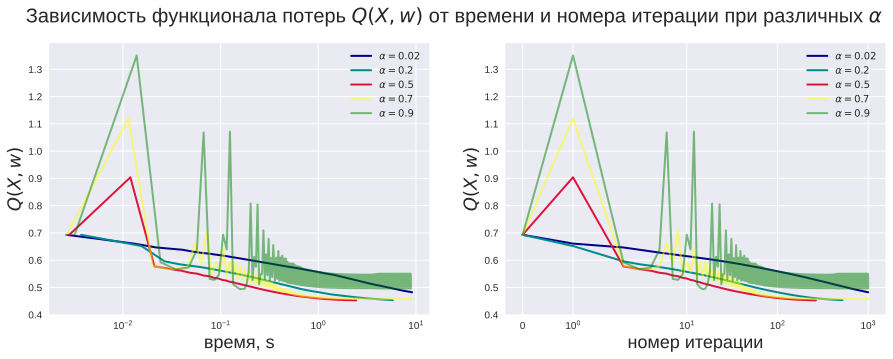

In [321]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость функционала потерь $Q(X, w)$ от времени и номера итерации при различных $\alpha$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(dic_a_lst[0]['time']).cumsum(), dic_a_lst[0]['func'], color='darkblue', linewidth=lw, label=r'$\alpha=0.02$')
    plt.plot(np.array(dic_a_lst[9]['time']).cumsum(), dic_a_lst[9]['func'], color='darkcyan', linewidth=lw, label=r'$\alpha=0.2$')
    plt.plot(np.array(dic_a_lst[24]['time']).cumsum(), dic_a_lst[24]['func'], color='crimson', linewidth=lw, label=r'$\alpha=0.5$')
    plt.plot(np.array(dic_a_lst[34]['time']).cumsum(), dic_a_lst[34]['func'], color='yellow', linewidth=lw, label=r'$\alpha=0.7$', alpha=0.5)
    plt.plot(np.array(dic_a_lst[44]['time']).cumsum(), dic_a_lst[44]['func'], color='green', linewidth=lw, label=r'$\alpha=0.9$', alpha=0.5)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    plt.yticks([0.4 + i*0.1 for i in range(10)])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.arange(0, len(dic_a_lst[0]['func'])), dic_a_lst[0]['func'], color='darkblue', linewidth=lw, label=r'$\alpha=0.02$')
    plt.plot(np.arange(0, len(dic_a_lst[9]['func'])), dic_a_lst[9]['func'], color='darkcyan', linewidth=lw, label=r'$\alpha=0.2$')
    plt.plot(np.arange(0, len(dic_a_lst[24]['func'])), dic_a_lst[24]['func'], color='crimson', linewidth=lw, label=r'$\alpha=0.5$')
    plt.plot(np.arange(0, len(dic_a_lst[34]['func'])), dic_a_lst[34]['func'], color='yellow', linewidth=lw, label=r'$\alpha=0.7$', alpha=0.5)
    plt.plot(np.arange(0, len(dic_a_lst[44]['func'])), dic_a_lst[44]['func'], color='green', linewidth=lw, label=r'$\alpha=0.9$',  alpha=0.5)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('symlog')
    plt.yticks([0.4 + i*0.1 for i in range(10)])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итерации", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('alpha_func.pdf')

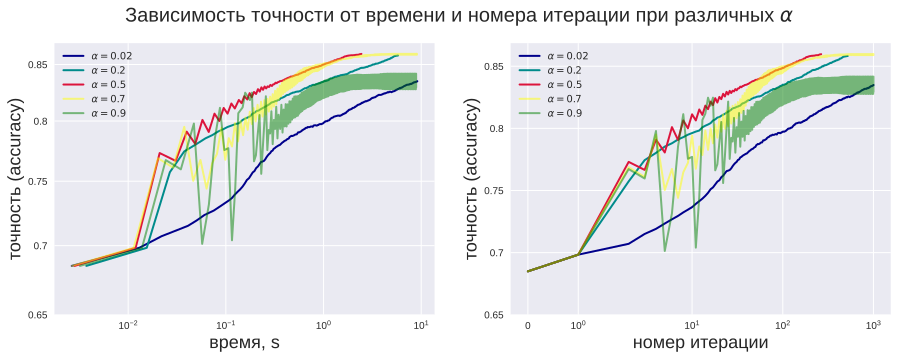

In [330]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость точности от времени и номера итерации при различных $\alpha$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(dic_a_lst[0]['time']).cumsum(), dic_a_lst[0]['accuracy'], color='darkblue', linewidth=lw, label=r'$\alpha=0.02$')
    plt.plot(np.array(dic_a_lst[9]['time']).cumsum(), dic_a_lst[9]['accuracy'], color='darkcyan', linewidth=lw, label=r'$\alpha=0.2$')
    plt.plot(np.array(dic_a_lst[24]['time']).cumsum(), dic_a_lst[24]['accuracy'], color='crimson', linewidth=lw, label=r'$\alpha=0.5$')
    plt.plot(np.array(dic_a_lst[34]['time']).cumsum(), dic_a_lst[34]['accuracy'], color='yellow', linewidth=lw, label=r'$\alpha=0.7$', alpha=0.5)
    plt.plot(np.array(dic_a_lst[44]['time']).cumsum(), dic_a_lst[44]['accuracy'], color='green', linewidth=lw, label=r'$\alpha=0.9$', alpha=0.5)

    #plt.grid()
    plt.yscale('log')
    plt.xscale('log')
    plt.yticks([0.65, 0.7, 0.75, 0.8, 0.85], [0.65, 0.7, 0.75, 0.8, 0.85])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.arange(0, len(dic_a_lst[0]['accuracy'])), dic_a_lst[0]['accuracy'], color='darkblue', linewidth=lw, label=r'$\alpha=0.02$')
    plt.plot(np.arange(0, len(dic_a_lst[9]['accuracy'])), dic_a_lst[9]['accuracy'], color='darkcyan', linewidth=lw, label=r'$\alpha=0.2$')
    plt.plot(np.arange(0, len(dic_a_lst[24]['accuracy'])), dic_a_lst[24]['accuracy'], color='crimson', linewidth=lw, label=r'$\alpha=0.5$')
    plt.plot(np.arange(0, len(dic_a_lst[34]['accuracy'])), dic_a_lst[34]['accuracy'], color='yellow', linewidth=lw, label=r'$\alpha=0.7$', alpha=0.5)
    plt.plot(np.arange(0, len(dic_a_lst[44]['accuracy'])), dic_a_lst[44]['accuracy'], color='green', linewidth=lw, label=r'$\alpha=0.9$', alpha=0.5)

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.65, 0.7, 0.75, 0.8, 0.85], [0.65, 0.7, 0.75, 0.8, 0.85])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итерации", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.savefig('alpha_accuracy.pdf')

In [217]:
dic_w_lst = []

In [218]:
gd = opt.GDClassifier('binary_logistic', step_alpha=1, step_beta=0.5, l2_coef=1e-2)
dic_w_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, valid=True))

In [219]:
w = np.squeeze(np.array(((y_train.to_numpy() * X_train) / np.sqrt((X_train.multiply(X_train).sum(axis=0))))))
gd = opt.GDClassifier('binary_logistic', step_alpha=1, step_beta=0.5, l2_coef=1e-2)
dic_w_lst.append(gd.fit(X_train, y_train.to_numpy(), w, trace=True, valid=True))

In [220]:
w =(np.random.rand(X_train.shape[1]) * 2 - 1)/(2*X_train.shape[1])
gd = opt.GDClassifier('binary_logistic', step_alpha=1, step_beta=0.5, l2_coef=1e-2)
dic_w_lst.append(gd.fit(X_train, y_train.to_numpy(), w, trace=True, valid=True))

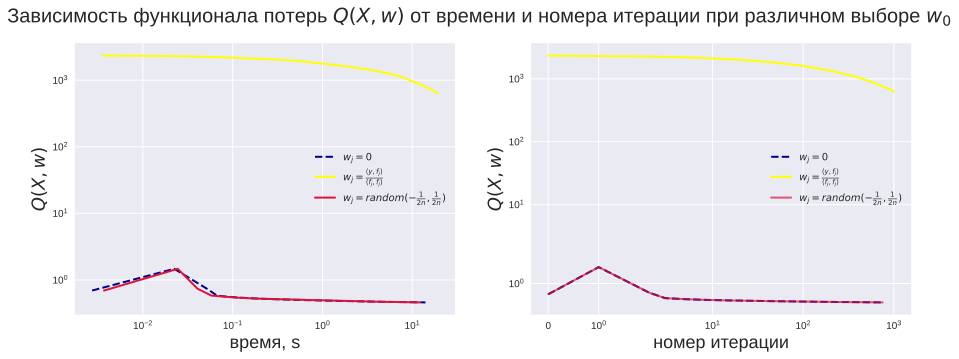

In [223]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость функционала потерь $Q(X, w)$ от времени и номера итерации при различном выборе $w_0$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(dic_w_lst[0]['time']).cumsum(), dic_w_lst[0]['func'], linestyle='--', color='darkblue', linewidth=lw,
             label=r'$w_j=0$')
    plt.plot(np.array(dic_w_lst[1]['time']).cumsum(), dic_w_lst[1]['func'], color='yellow', linewidth=lw,
             label=r'$w_j=\frac{ \langle y, f_j \rangle}{ \langle f_j, f_j \rangle}$')
    plt.plot(np.array(dic_w_lst[2]['time']).cumsum(), dic_w_lst[2]['func'], color='crimson', linewidth=lw, label=r'$w_j=random(-\frac{1}{2n}, \frac{1}{2n})$')

    #plt.grid()
    plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.arange(0, len(dic_w_lst[0]['func'])), dic_w_lst[0]['func'], linestyle='--', color='darkblue', linewidth=lw,
             label=r'$w_j=0$')
    plt.plot(np.arange(0, len(dic_w_lst[1]['func'])), dic_w_lst[1]['func'], color='yellow', linewidth=lw,
             label=r'$w_j=\frac{ \langle y, f_j \rangle}{ \langle f_j, f_j \rangle}$')
    plt.plot(np.arange(0, len(dic_w_lst[2]['func'])), dic_w_lst[2]['func'], color='crimson', linewidth=lw,
              label=r'$w_j=random(-\frac{1}{2n}, \frac{1}{2n})$', alpha=0.7)

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итерации", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.savefig('w_func.pdf')

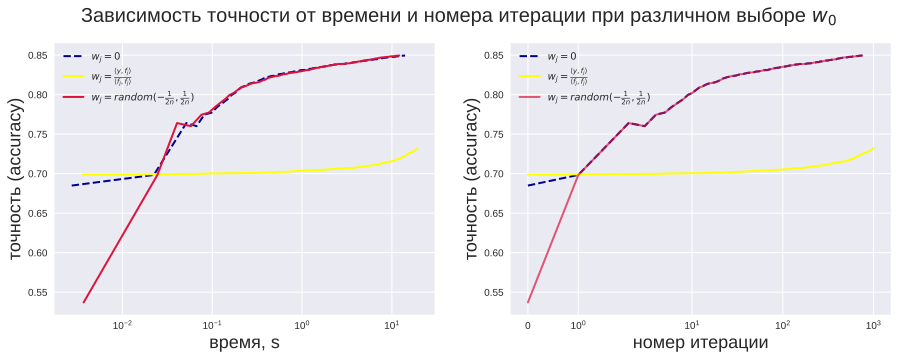

In [225]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость точности от времени и номера итерации при различном выборе $w_0$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(dic_w_lst[0]['time']).cumsum(), dic_w_lst[0]['accuracy'], linestyle='--', color='darkblue', linewidth=lw,
             label=r'$w_j=0$')
    plt.plot(np.array(dic_w_lst[1]['time']).cumsum(), dic_w_lst[1]['accuracy'], color='yellow', linewidth=lw,
             label=r'$w_j=\frac{ \langle y, f_j \rangle}{ \langle f_j, f_j \rangle}$')
    plt.plot(np.array(dic_w_lst[2]['time']).cumsum(), dic_w_lst[2]['accuracy'], color='crimson', linewidth=lw, label=r'$w_j=random(-\frac{1}{2n}, \frac{1}{2n})$')

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.1*i for i in range(6,9)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.arange(0, len(dic_w_lst[0]['func'])), dic_w_lst[0]['accuracy'], linestyle='--', color='darkblue', linewidth=lw,
             label=r'$w_j=0$')
    plt.plot(np.arange(0, len(dic_w_lst[1]['func'])), dic_w_lst[1]['accuracy'], color='yellow', linewidth=lw,
             label=r'$w_j=\frac{ \langle y, f_j \rangle}{ \langle f_j, f_j \rangle}$')
    plt.plot(np.arange(0, len(dic_w_lst[2]['func'])), dic_w_lst[2]['accuracy'], color='crimson', linewidth=lw,
              label=r'$w_j=random(-\frac{1}{2n}, \frac{1}{2n})$', alpha=0.7)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('symlog')
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итерации", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('w_accuracy.pdf')

In [14]:
s_dic_b_lst = []
for i in [2, 5, 10, 15, 25]:
    gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_beta=i/10, tolerance=1e-4, l2_coef=1e-2)
    s_dic_b_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, log_freq=0.1, valid=True))

In [15]:
sum(s_dic_b_lst[2]['time'])

5.744061708450317

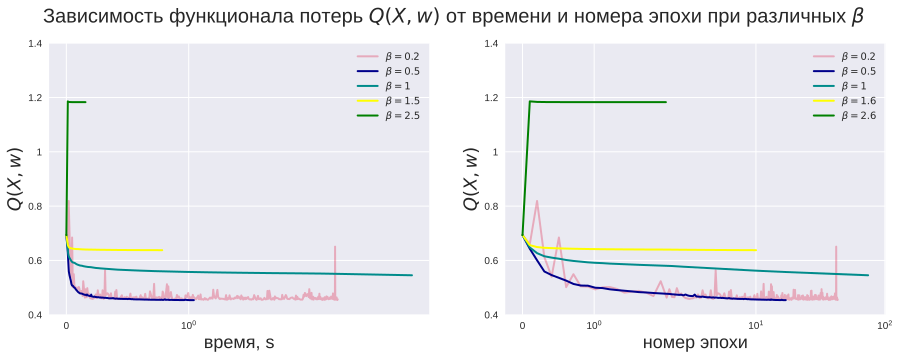

In [35]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость функционала потерь $Q(X, w)$ от времени и номера эпохи при различных $\beta$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_b_lst[0]['time']).cumsum(), s_dic_b_lst[0]['func'], color='crimson', linewidth=lw, label=r'$\beta=0.2$', alpha=0.3)
    plt.plot(np.array(s_dic_b_lst[1]['time']).cumsum(), s_dic_b_lst[1]['func'], color='darkblue', linewidth=lw, label=r'$\beta=0.5$')
    plt.plot(np.array(s_dic_b_lst[2]['time']).cumsum(), s_dic_b_lst[2]['func'], color='darkcyan', linewidth=lw, label=r'$\beta=1$')
    plt.plot(np.array(s_dic_b_lst[3]['time']).cumsum(), s_dic_b_lst[3]['func'], color='yellow', linewidth=lw, label=r'$\beta=1.5$')
    plt.plot(np.array(s_dic_b_lst[4]['time']).cumsum(), s_dic_b_lst[4]['func'], color='green', linewidth=lw, label=r'$\beta=2.5$')

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('symlog')
    plt.yticks([0.4, 0.6, 0.8, 1, 1.2, 1.4], [0.4, 0.6, 0.8, 1, 1.2, 1.4])
    #plt.xticks([10**i for i in range(-5, 3)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_b_lst[0]['epoch_num'], s_dic_b_lst[0]['func'], color='crimson', linewidth=lw, label=r'$\beta=0.2$', alpha=0.3)
    plt.plot(s_dic_b_lst[1]['epoch_num'], s_dic_b_lst[1]['func'], color='darkblue', linewidth=lw, label=r'$\beta=0.5$')
    plt.plot(s_dic_b_lst[2]['epoch_num'], s_dic_b_lst[2]['func'], color='darkcyan', linewidth=lw, label=r'$\beta=1$')
    plt.plot(s_dic_b_lst[3]['epoch_num'], s_dic_b_lst[3]['func'], color='yellow', linewidth=lw, label=r'$\beta=1.6$')
    plt.plot(s_dic_b_lst[4]['epoch_num'], s_dic_b_lst[4]['func'], color='green', linewidth=lw, label=r'$\beta=2.6$')

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('symlog')
    plt.yticks([0.4, 0.6, 0.8, 1, 1.2, 1.4], [0.4, 0.6, 0.8, 1, 1.2, 1.4])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('sgd_beta_func.pdf')

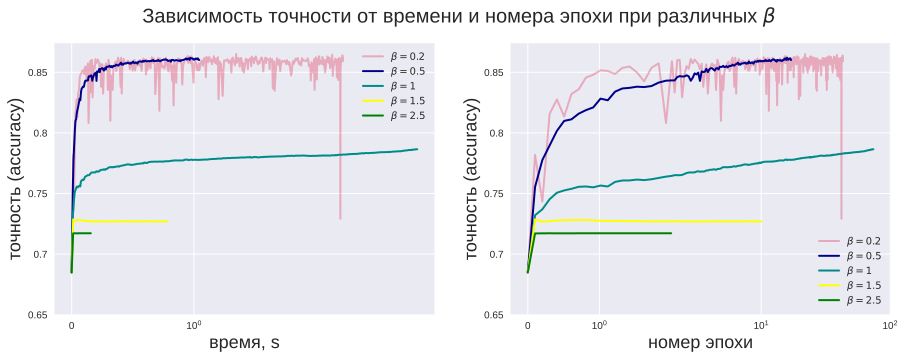

In [36]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость точности от времени и номера эпохи при различных $\beta$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_b_lst[0]['time']).cumsum(), s_dic_b_lst[0]['accuracy'], color='crimson', linewidth=lw, label=r'$\beta=0.2$', alpha=0.3)
    plt.plot(np.array(s_dic_b_lst[1]['time']).cumsum(), s_dic_b_lst[1]['accuracy'], color='darkblue', linewidth=lw, label=r'$\beta=0.5$')
    plt.plot(np.array(s_dic_b_lst[2]['time']).cumsum(), s_dic_b_lst[2]['accuracy'], color='darkcyan', linewidth=lw, label=r'$\beta=1$')
    plt.plot(np.array(s_dic_b_lst[3]['time']).cumsum(), s_dic_b_lst[3]['accuracy'], color='yellow', linewidth=lw, label=r'$\beta=1.5$')
    plt.plot(np.array(s_dic_b_lst[4]['time']).cumsum(), s_dic_b_lst[4]['accuracy'], color='green', linewidth=lw, label=r'$\beta=2.5$')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.65, 0.7, 0.75, 0.8, 0.85], [0.65, 0.7, 0.75, 0.8, 0.85])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_b_lst[0]['epoch_num'], s_dic_b_lst[0]['accuracy'], color='crimson', linewidth=lw, label=r'$\beta=0.2$',  alpha=0.3)
    plt.plot(s_dic_b_lst[1]['epoch_num'], s_dic_b_lst[1]['accuracy'], color='darkblue', linewidth=lw, label=r'$\beta=0.5$')
    plt.plot(s_dic_b_lst[2]['epoch_num'], s_dic_b_lst[2]['accuracy'], color='darkcyan', linewidth=lw, label=r'$\beta=1$')
    plt.plot(s_dic_b_lst[3]['epoch_num'], s_dic_b_lst[3]['accuracy'], color='yellow', linewidth=lw, label=r'$\beta=1.5$')
    plt.plot(s_dic_b_lst[4]['epoch_num'], s_dic_b_lst[4]['accuracy'], color='green', linewidth=lw, label=r'$\beta=2.5$')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.65, 0.7, 0.75, 0.8, 0.85], [0.65, 0.7, 0.75, 0.8, 0.85])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.savefig('sgd_beta_accuracy.pdf')

In [18]:
s_dic_a_lst = []
for i in range(1, 21):
    gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=i/20, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)
    s_dic_a_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, log_freq=0.1, valid=True))

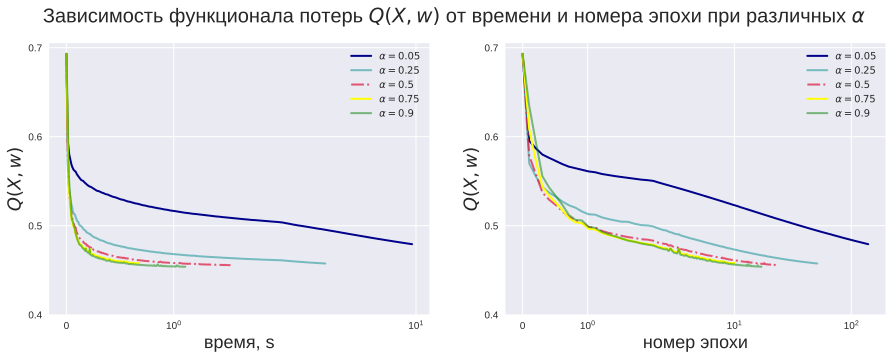

In [37]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость функционала потерь $Q(X, w)$ от времени и номера эпохи при различных $\alpha$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_a_lst[0]['time']).cumsum(), s_dic_a_lst[0]['func'], color='darkblue', linewidth=lw, label=r'$\alpha=0.05$')
    plt.plot(np.array(s_dic_a_lst[4]['time']).cumsum(), s_dic_a_lst[4]['func'], color='darkcyan', linewidth=lw, label=r'$\alpha=0.25$', alpha=0.5)
    plt.plot(np.array(s_dic_a_lst[9]['time']).cumsum(), s_dic_a_lst[9]['func'], linestyle='-.', color='crimson', linewidth=lw, label=r'$\alpha=0.5$', alpha=0.7)
    plt.plot(np.array(s_dic_a_lst[14]['time']).cumsum(), s_dic_a_lst[14]['func'], color='yellow', linewidth=lw, label=r'$\alpha=0.75$')
    plt.plot(np.array(s_dic_a_lst[18]['time']).cumsum(), s_dic_a_lst[18]['func'], color='green', linewidth=lw, label=r'$\alpha=0.9$',  alpha=0.5)

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_a_lst[0]['epoch_num'], s_dic_a_lst[0]['func'], color='darkblue', linewidth=lw, label=r'$\alpha=0.05$')
    plt.plot(s_dic_a_lst[4]['epoch_num'], s_dic_a_lst[4]['func'], color='darkcyan', linewidth=lw, label=r'$\alpha=0.25$', alpha=0.5)
    plt.plot(s_dic_a_lst[9]['epoch_num'], s_dic_a_lst[9]['func'], linestyle='-.', color='crimson', linewidth=lw, label=r'$\alpha=0.5$', alpha=0.7)
    plt.plot(s_dic_a_lst[14]['epoch_num'], s_dic_a_lst[14]['func'], color='yellow', linewidth=lw, label=r'$\alpha=0.75$')
    plt.plot(s_dic_a_lst[18]['epoch_num'], s_dic_a_lst[18]['func'], color='green', linewidth=lw, label=r'$\alpha=0.9$',  alpha=0.5)

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([5, 10, 20, 30, 40, 60, 80, 100])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('sgd_alpha_func.pdf')

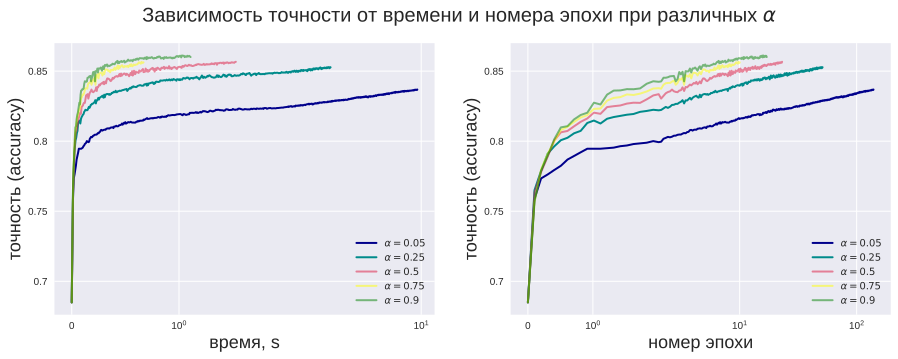

In [38]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость точности от времени и номера эпохи при различных $\alpha$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_a_lst[0]['time']).cumsum(), s_dic_a_lst[0]['accuracy'], color='darkblue', linewidth=lw, label=r'$\alpha=0.05$')
    plt.plot(np.array(s_dic_a_lst[4]['time']).cumsum(), s_dic_a_lst[4]['accuracy'], color='darkcyan', linewidth=lw, label=r'$\alpha=0.25$')
    plt.plot(np.array(s_dic_a_lst[9]['time']).cumsum(), s_dic_a_lst[9]['accuracy'], color='crimson', linewidth=lw, label=r'$\alpha=0.5$', alpha=0.5)
    plt.plot(np.array(s_dic_a_lst[14]['time']).cumsum(), s_dic_a_lst[14]['accuracy'], color='yellow', linewidth=lw, label=r'$\alpha=0.75$', alpha=0.5)
    plt.plot(np.array(s_dic_a_lst[18]['time']).cumsum(), s_dic_a_lst[18]['accuracy'], color='green', linewidth=lw, label=r'$\alpha=0.9$', alpha=0.5)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_a_lst[0]['epoch_num'], s_dic_a_lst[0]['accuracy'], color='darkblue', linewidth=lw, label=r'$\alpha=0.05$')
    plt.plot(s_dic_a_lst[4]['epoch_num'], s_dic_a_lst[4]['accuracy'], color='darkcyan', linewidth=lw, label=r'$\alpha=0.25$')
    plt.plot(s_dic_a_lst[9]['epoch_num'], s_dic_a_lst[9]['accuracy'], color='crimson', linewidth=lw, label=r'$\alpha=0.5$', alpha=0.5)
    plt.plot(s_dic_a_lst[14]['epoch_num'], s_dic_a_lst[14]['accuracy'], color='yellow', linewidth=lw, label=r'$\alpha=0.75$', alpha=0.5)
    plt.plot(s_dic_a_lst[18]['epoch_num'], s_dic_a_lst[18]['accuracy'], color='green', linewidth=lw, label=r'$\alpha=0.9$', alpha=0.5)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.savefig('sgd_alpha_accuracy.pdf')

In [361]:
s_dic_a_lst = []
for i in range(1, 21):
    gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=i/50, step_beta=0,tolerance=1e-5,max_iter=50, l2_coef=1e-2)
    s_dic_a_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, log_freq=0.1, valid=True))

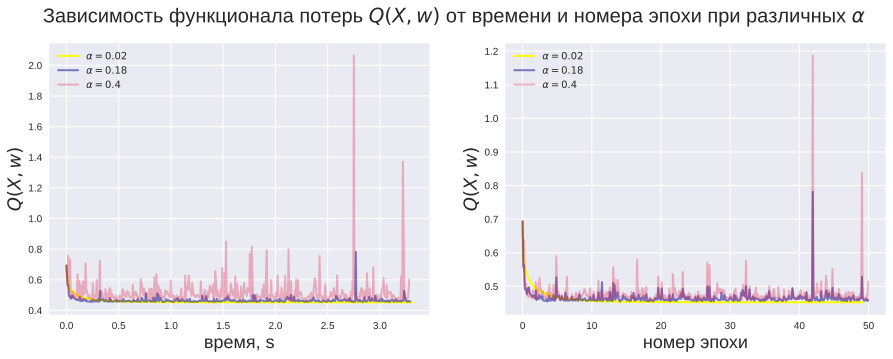

In [371]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость функционала потерь $Q(X, w)$ от времени и номера эпохи при различных $\alpha$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_a_lst[0]['time']).cumsum(), s_dic_a_lst[0]['func'], color='yellow', linewidth=lw, label=r'$\alpha=0.02$')
    plt.plot(np.array(s_dic_a_lst[8]['time']).cumsum(), s_dic_a_lst[8]['func'], color='darkblue', linewidth=lw, label=r'$\alpha=0.18$', alpha=0.5)
    plt.plot(np.array(s_dic_a_lst[19]['time']).cumsum(), s_dic_a_lst[19]['func'], color='crimson', linewidth=lw, label=r'$\alpha=0.4$', alpha=0.3)

    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.yticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_a_lst[0]['epoch_num'], s_dic_a_lst[0]['func'], color='yellow', linewidth=lw, label=r'$\alpha=0.02$')
    plt.plot(s_dic_a_lst[8]['epoch_num'], s_dic_a_lst[8]['func'], color='darkblue', linewidth=lw, label=r'$\alpha=0.18$', alpha=0.5)
    plt.plot(s_dic_a_lst[12]['epoch_num'], s_dic_a_lst[12]['func'], color='crimson', linewidth=lw, label=r'$\alpha=0.4$', alpha=0.3)

    #plt.grid()
    #plt.yscale('symlog')
    #plt.xscale('symlog')
    #plt.yticks([0.4, 0.5, 0.6, 0.7], [0.4, 0.5, 0.6, 0.7])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([5, 10, 20, 30, 40, 60, 80, 100])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('sgd_alpha_betaconst_func.pdf')

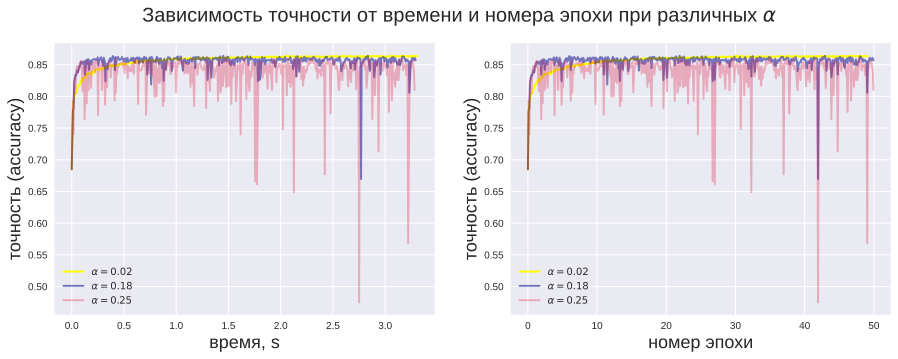

In [372]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость точности от времени и номера эпохи при различных $\alpha$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_a_lst[0]['time']).cumsum(), s_dic_a_lst[0]['accuracy'], color='yellow', linewidth=lw, label=r'$\alpha=0.02$')
    plt.plot(np.array(s_dic_a_lst[8]['time']).cumsum(), s_dic_a_lst[8]['accuracy'], color='darkblue', linewidth=lw, label=r'$\alpha=0.18$', alpha=0.5)
    plt.plot(np.array(s_dic_a_lst[19]['time']).cumsum(), s_dic_a_lst[19]['accuracy'], color='crimson', linewidth=lw, label=r'$\alpha=0.25$', alpha=0.3)

    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('symlog')
    #plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_a_lst[0]['epoch_num'], s_dic_a_lst[0]['accuracy'], color='yellow', linewidth=lw, label=r'$\alpha=0.02$')
    plt.plot(s_dic_a_lst[8]['epoch_num'], s_dic_a_lst[8]['accuracy'], color='darkblue', linewidth=lw, label=r'$\alpha=0.18$', alpha=0.5)
    plt.plot(s_dic_a_lst[19]['epoch_num'], s_dic_a_lst[19]['accuracy'], color='crimson', linewidth=lw, label=r'$\alpha=0.25$', alpha=0.3)

    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('symlog')
    #plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.savefig('sgd_alpha_betconst_accuracy.pdf')

In [21]:
s_dic_w_lst = []
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=1, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)
s_dic_w_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, log_freq=0.1, valid=True))
w = np.squeeze(np.array(((y_train.to_numpy() * X_train) / np.sqrt((X_train.multiply(X_train).sum(axis=0))))))
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=1, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)
s_dic_w_lst.append(gd.fit(X_train, y_train.to_numpy(), w, trace=True, log_freq=0.1, valid=True))
w = w_k = (np.random.rand(X_train.shape[1]) * 2 - 1)/(2*X_train.shape[1])
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=1, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)
s_dic_w_lst.append(gd.fit(X_train, y_train.to_numpy(), w, trace=True, log_freq=0.1, valid=True))

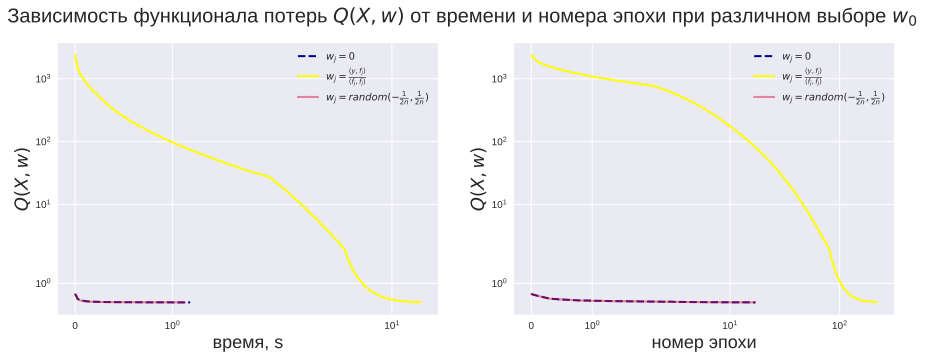

In [39]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость функционала потерь $Q(X, w)$ от времени и номера эпохи при различном выборе $w_0$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_w_lst[0]['time']).cumsum(), s_dic_w_lst[0]['func'], linestyle='--', color='darkblue', linewidth=lw,
             label=r'$w_j=0$')
    plt.plot(np.array(s_dic_w_lst[1]['time']).cumsum(), s_dic_w_lst[1]['func'], color='yellow', linewidth=lw,
             label=r'$w_j=\frac{ \langle y, f_j \rangle}{ \langle f_j, f_j \rangle}$')
    plt.plot(np.array(s_dic_w_lst[2]['time']).cumsum(), s_dic_w_lst[2]['func'], color='crimson', linewidth=lw, label=r'$w_j=random(-\frac{1}{2n}, \frac{1}{2n})$', alpha=0.5)

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_w_lst[0]['epoch_num'], s_dic_w_lst[0]['func'], linestyle='--', color='darkblue', linewidth=lw,
             label=r'$w_j=0$')
    plt.plot(s_dic_w_lst[1]['epoch_num'], s_dic_w_lst[1]['func'], color='yellow', linewidth=lw,
             label=r'$w_j=\frac{ \langle y, f_j \rangle}{ \langle f_j, f_j \rangle}$')
    plt.plot(s_dic_w_lst[2]['epoch_num'], s_dic_w_lst[2]['func'], color='crimson', linewidth=lw,
              label=r'$w_j=random(-\frac{1}{2n}, \frac{1}{2n})$', alpha=0.5)

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.savefig('sgd_w_func.pdf')

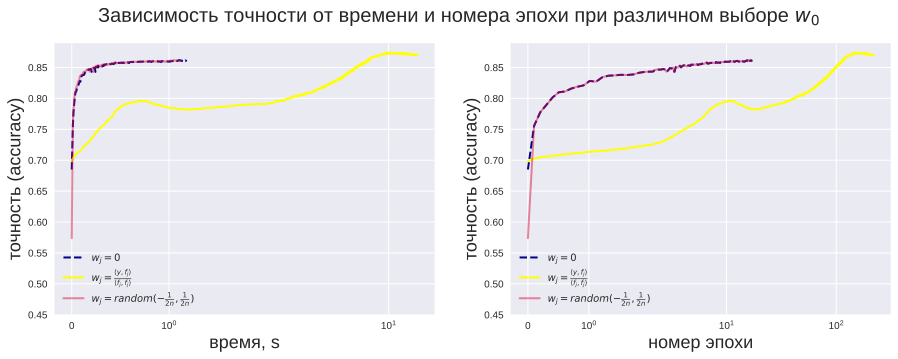

In [40]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость точности от времени и номера эпохи при различном выборе $w_0$", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_w_lst[0]['time']).cumsum(), s_dic_w_lst[0]['accuracy'], linestyle='--', color='darkblue', linewidth=lw,
             label=r'$w_j=0$')
    plt.plot(np.array(s_dic_w_lst[1]['time']).cumsum(), s_dic_w_lst[1]['accuracy'], color='yellow', linewidth=lw,
             label=r'$w_j=\frac{ \langle y, f_j \rangle}{ \langle f_j, f_j \rangle}$')
    plt.plot(np.array(s_dic_w_lst[2]['time']).cumsum(), s_dic_w_lst[2]['accuracy'], color='crimson', linewidth=lw, label=r'$w_j=random(-\frac{1}{2n}, \frac{1}{2n})$', alpha=0.5)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('symlog')
    plt.yticks([0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85])
    #plt.yticks([i for i in range(12)])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_w_lst[0]['epoch_num'], s_dic_w_lst[0]['accuracy'], linestyle='--', color='darkblue', linewidth=lw,
             label=r'$w_j=0$')
    plt.plot(s_dic_w_lst[1]['epoch_num'], s_dic_w_lst[1]['accuracy'], color='yellow', linewidth=lw,
             label=r'$w_j=\frac{ \langle y, f_j \rangle}{ \langle f_j, f_j \rangle}$')
    plt.plot(s_dic_w_lst[2]['epoch_num'], s_dic_w_lst[2]['accuracy'], color='crimson', linewidth=lw,
              label=r'$w_j=random(-\frac{1}{2n}, \frac{1}{2n})$', alpha=0.5)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('symlog')
    plt.yticks([0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85])
    #plt.yticks([0.7, 0.75, 0.8, 0.85])
    #plt.xticks([10**i for i in range(-20, 2)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('sgd_w_accuracy.pdf')

In [24]:
s_dic_batch_lst = []
for i in range(0, 5):
    if i == 0:
        m = 10
    else:
        m = 1000
    gd = opt.SGDClassifier('binary_logistic', batch_size=10**i, step_beta=0.5,tolerance=1e-4, max_iter=m, l2_coef=1e-2)
    s_dic_batch_lst.append(gd.fit(X_train, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

In [25]:
sum(s_dic_batch_lst[0]['time'])

34.807814836502075

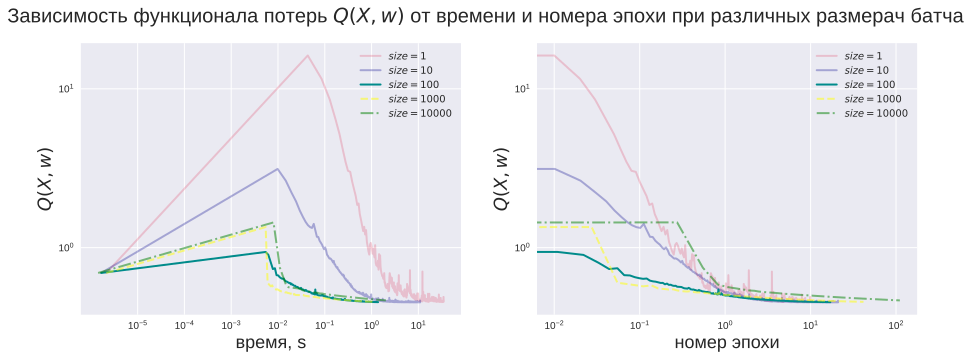

In [41]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость функционала потерь $Q(X, w)$ от времени и номера эпохи при различных размерач батча", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_batch_lst[0]['time']).cumsum(), s_dic_batch_lst[0]['func'], color='crimson', linewidth=lw, label=r'$size=1$', alpha=0.2)
    plt.plot(np.array(s_dic_batch_lst[1]['time']).cumsum(), s_dic_batch_lst[1]['func'], color='darkblue', linewidth=lw, label=r'$size=10$', alpha=0.3)
    plt.plot(np.array(s_dic_batch_lst[2]['time']).cumsum(), s_dic_batch_lst[2]['func'], color='darkcyan', linewidth=lw, label=r'$size=100$')
    plt.plot(np.array(s_dic_batch_lst[3]['time']).cumsum(), s_dic_batch_lst[3]['func'], linestyle='--', color='yellow', linewidth=lw, label=r'$size=1000$', alpha=0.5)
    plt.plot(np.array(s_dic_batch_lst[4]['time']).cumsum(), s_dic_batch_lst[4]['func'], linestyle='-.', color='green', linewidth=lw, label=r'$size=10000$',alpha=0.5)

    #plt.grid()
    plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.4, 0.6, 0.8, 1], [0.4, 0.6, 0.8, 1])
    plt.xticks([10**i for i in range(-5, 2)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_batch_lst[0]['epoch_num'], s_dic_batch_lst[0]['func'], color='crimson', linewidth=lw, label=r'$size=1$', alpha=0.2)
    plt.plot(s_dic_batch_lst[1]['epoch_num'], s_dic_batch_lst[1]['func'], color='darkblue', linewidth=lw, label=r'$size=10$', alpha=0.3)
    plt.plot(s_dic_batch_lst[2]['epoch_num'], s_dic_batch_lst[2]['func'],color='darkcyan', linewidth=lw, label=r'$size=100$')
    plt.plot(s_dic_batch_lst[3]['epoch_num'], s_dic_batch_lst[3]['func'],linestyle='--', color='yellow', linewidth=lw, label=r'$size=1000$', alpha=0.5)
    plt.plot(s_dic_batch_lst[4]['epoch_num'], s_dic_batch_lst[4]['func'], linestyle='-.', color='green', linewidth=lw, label=r'$size=10000$',alpha=0.5)

    #plt.grid()
    plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.4, 0.6, 0.8, 1], [0.4, 0.6, 0.8, 1])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('sgd_batch_func.pdf')

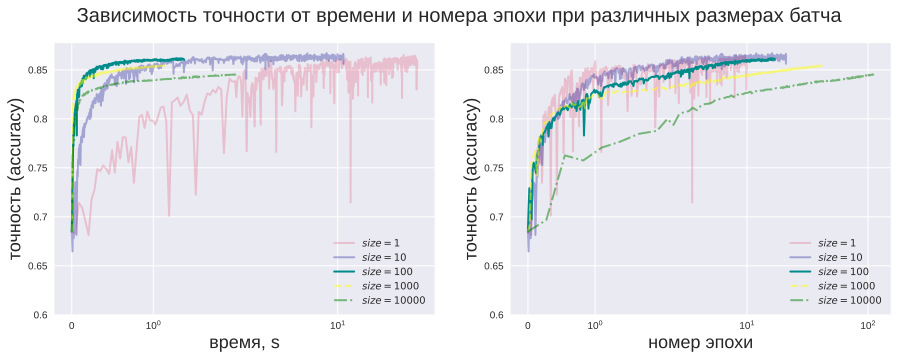

In [42]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Зависимость точности от времени и номера эпохи при различных размерах батча", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(s_dic_batch_lst[0]['time']).cumsum(), s_dic_batch_lst[0]['accuracy'], color='crimson', linewidth=lw, label=r'$size=1$', alpha=0.2)
    plt.plot(np.array(s_dic_batch_lst[1]['time']).cumsum(), s_dic_batch_lst[1]['accuracy'], color='darkblue', linewidth=lw, label=r'$size=10$',   alpha=0.3)
    plt.plot(np.array(s_dic_batch_lst[2]['time']).cumsum(), s_dic_batch_lst[2]['accuracy'], color='darkcyan', linewidth=lw, label=r'$size=100$')
    plt.plot(np.array(s_dic_batch_lst[3]['time']).cumsum(), s_dic_batch_lst[3]['accuracy'], linestyle='--', color='yellow', linewidth=lw, label=r'$size=1000$',alpha=0.5)
    plt.plot(np.array(s_dic_batch_lst[4]['time']).cumsum(), s_dic_batch_lst[4]['accuracy'], linestyle='-.', color='green', linewidth=lw, label=r'$size=10000$',alpha=0.5)

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.6, 0.65, 0.7, 0.75, 0.8, 0.85], [0.6, 0.65, 0.7, 0.75, 0.8, 0.85])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(s_dic_batch_lst[0]['epoch_num'], s_dic_batch_lst[0]['accuracy'], color='crimson', linewidth=lw, label=r'$size=1$', alpha=0.2)
    plt.plot(s_dic_batch_lst[1]['epoch_num'], s_dic_batch_lst[1]['accuracy'], color='darkblue', linewidth=lw, label=r'$size=10$',   alpha=0.3)
    plt.plot(s_dic_batch_lst[2]['epoch_num'], s_dic_batch_lst[2]['accuracy'], color='darkcyan', linewidth=lw, label=r'$size=100$')
    plt.plot(s_dic_batch_lst[3]['epoch_num'], s_dic_batch_lst[3]['accuracy'], linestyle='--', color='yellow', linewidth=lw, label=r'$size=1000$',alpha=0.5)
    plt.plot(s_dic_batch_lst[4]['epoch_num'], s_dic_batch_lst[4]['accuracy'], linestyle='-.', color='green', linewidth=lw, label=r'$size=10000$',alpha=0.5)

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.6, 0.65, 0.7, 0.75, 0.8, 0.85], [0.6, 0.65, 0.7, 0.75, 0.8, 0.85])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('sgd_batch_accuracy.pdf')

In [ ]:
1000*np.array(s_dic_batch_lst[0]['time'])

In [48]:
gd_vs_sgd = []
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.9, step_beta=0.5,tolerance=1e-5, l2_coef=1e-2)
gd_vs_sgd.append(gd.fit(X_train, y_train.to_numpy(), trace=True, log_freq=1, valid=True))
gd = opt.GDClassifier('binary_logistic', step_alpha=0.3, step_beta=0.2,tolerance=1e-5, l2_coef=1e-2)
gd_vs_sgd.append(gd.fit(X_train, y_train.to_numpy(), trace=True, valid=True))

In [31]:
gd = opt.GDClassifier('binary_logistic', step_alpha=0.9, step_beta=0.5, l2_coef=1e-2)
gd.fit(X_train, y_train.to_numpy(), trace=True, valid=True)
(gd.predict(X_test) == y_test).mean()

0.8250145095763204

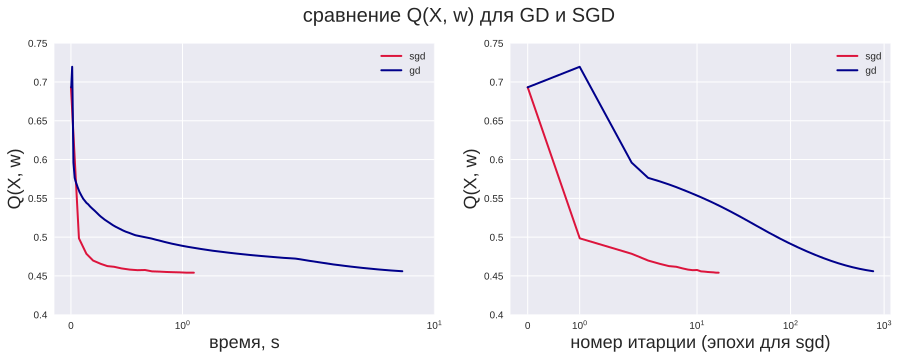

In [130]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"сравнение Q(X, w) для GD и SGD", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(gd_vs_sgd[0]['time']).cumsum(), gd_vs_sgd[0]['func'], color='crimson', linewidth=lw, label=r'sgd')
    plt.plot(np.array(gd_vs_sgd[1]['time']).cumsum(), gd_vs_sgd[1]['func'], color='darkblue', linewidth=lw, label=r'gd')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75], [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
    plt.xticks([0, 1, 10])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"Q(X, w)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(gd_vs_sgd[0]['epoch_num']), gd_vs_sgd[0]['func'], color='crimson', linewidth=lw, label=r'sgd')
    plt.plot(np.arange(0, len(gd_vs_sgd[1]['func'])), gd_vs_sgd[1]['func'], color='darkblue', linewidth=lw, label=r'gd')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75], [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итарции (эпохи для sgd)", fontsize=18)
    plt.ylabel(r"Q(X, w)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('func_sgd_vs_gd.pdf')

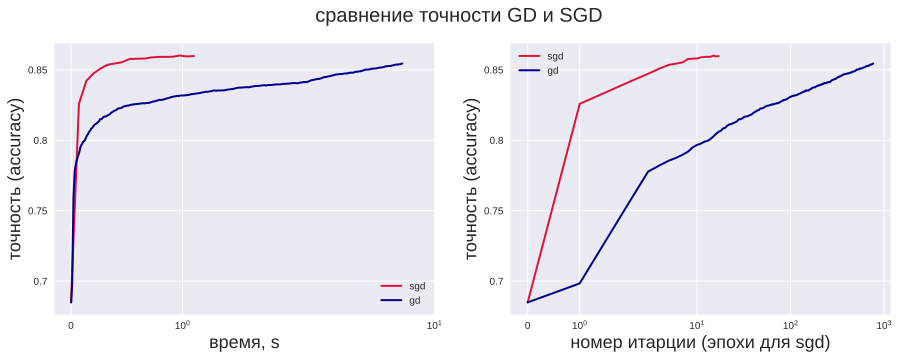

In [127]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"сравнение точности GD и SGD", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(gd_vs_sgd[0]['time']).cumsum(), gd_vs_sgd[0]['accuracy'], color='crimson', linewidth=lw, label=r'sgd')
    plt.plot(np.array(gd_vs_sgd[1]['time']).cumsum(), gd_vs_sgd[1]['accuracy'], color='darkblue', linewidth=lw, label=r'gd')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    plt.xticks([0, 1, 10])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(gd_vs_sgd[0]['epoch_num']), gd_vs_sgd[0]['accuracy'], color='crimson', linewidth=lw, label=r'sgd')
    plt.plot(np.arange(0, len(gd_vs_sgd[1]['accuracy'])), gd_vs_sgd[1]['accuracy'], color='darkblue', linewidth=lw, label=r'gd')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итарции (эпохи для sgd)", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('sgd_vs_gd.pdf')

In [ ]:
import time
a = time.time()
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.9, step_beta=0.5, l2_coef=1e-2)
hist = gd.fit(X_train, y_train.to_numpy(), trace=True, log_freq=1, valid=True)
print(time.time() - a)

In [ ]:
hist['epoch_num']

In [ ]:
np.array(hist['time'])

In [ ]:
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=1, step_beta=0, l2_coef=1e-2)
hist = gd.fit(X_train, y_train.to_numpy(), trace=True, log_freq=0.1, valid=True)

In [9]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk import wordnet
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alexandr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alexandr/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/alexandr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
stopWords = set(stopwords.words('english'))
swds = list(stopWords)

In [11]:
WordNetLemmatizer().lemmatize

<bound method WordNetLemmatizer.lemmatize of <WordNetLemmatizer>>

In [12]:
def get_wordnet_pos(treebank_tag):
    my_switch = {'J': wordnet.wordnet.ADJ,
                 'V': wordnet.wordnet.VERB,
                 'N': wordnet.wordnet.NOUN,
                 'R': wordnet.wordnet.ADV}
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

In [13]:
def simple_lemmatizer(sentence):
    new_sentence = sentence.lower()
    new_sentence = re.sub(r'[^0-9a-z!]', ' ', new_sentence)
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = new_sentence.split()
    pos_taged = [(word, get_wordnet_pos(tag))
                 for word, tag in nltk.pos_tag(tokenized_sent)]
    return ' '.join([lemmatizer.lemmatize(word, tag)
                    for word, tag in pos_taged])

In [160]:
simple_lemmatizer('George ADMITTED the talks happened')

'george admit the talk happen'

In [166]:
WordNetLemmatizer().lemmatize('ADMITTED', wordnet.wordnet.VERB)

'ADMITTED'

In [204]:
X_train = train.apply(lambda row: simple_lemmatizer(row['comment_text']), axis=1)
X_test = test.apply(lambda row: simple_lemmatizer(row['comment_text']), axis=1)

In [205]:
nltk.pos_tag(['ADMITTED', 'crab'])

[('ADMITTED', 'NNP'), ('crab', 'NN')]

In [226]:
vectorizer = CountVectorizer(min_df=0.001, stop_words=swds)

In [227]:
X_tr = vectorizer.fit_transform(X_train.to_list())
X_te = vectorizer.transform(X_test.to_list())

In [228]:
len(vectorizer.get_feature_names())

3028

In [191]:
for i in range(1,8701):
    if i*'!' in vectorizer.get_feature_names():
        print('yes')

In [127]:
'albanian' in vectorizer.get_feature_names()

True

In [222]:
gd = opt.GDClassifier('binary_logistic', step_alpha=1, step_beta=0.2, tolerance=1e-5, l2_coef=1e-2)

In [223]:
dic = gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=True)

In [224]:
a_pred = gd.predict(X_te)

In [225]:
(a_pred == y_test).mean()

0.852147417295415

In [136]:
gd_sgd_lemm = []
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.9, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)
gd_sgd_lemm.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
gd = opt.GDClassifier('binary_logistic', step_alpha=0.3, step_beta=0.2, l2_coef=1e-2)
gd_sgd_lemm.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=True))

KeyboardInterrupt: 

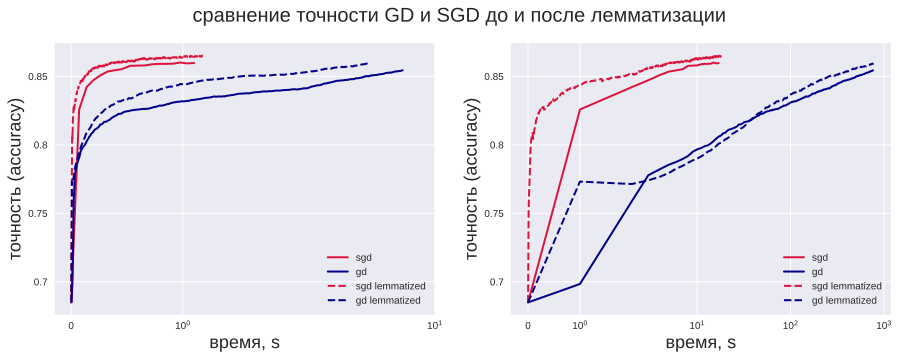

In [203]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"сравнение точности GD и SGD до и после лемматизации", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(gd_vs_sgd[0]['time']).cumsum(), gd_vs_sgd[0]['accuracy'], color='crimson', linewidth=lw, label=r'sgd')
    plt.plot(np.array(gd_vs_sgd[1]['time']).cumsum(), gd_vs_sgd[1]['accuracy'], color='darkblue', linewidth=lw, label=r'gd')
    plt.plot(np.array(gd_sgd_lemm[0]['time']).cumsum(), gd_sgd_lemm[0]['accuracy'], linestyle='--', color='crimson', linewidth=lw, label=r'sgd lemmatized')
    plt.plot(np.array(gd_sgd_lemm[1]['time']).cumsum(), gd_sgd_lemm[1]['accuracy'], linestyle='--', color='darkblue', linewidth=lw, label=r'gd lemmatized')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    plt.xticks([0, 1, 10])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(gd_vs_sgd[0]['epoch_num'], gd_vs_sgd[0]['accuracy'], color='crimson', linewidth=lw, label=r'sgd')
    plt.plot(range(0, len(gd_vs_sgd[1]['accuracy'])), gd_vs_sgd[1]['accuracy'], color='darkblue', linewidth=lw, label=r'gd')
    plt.plot(gd_sgd_lemm[0]['epoch_num'], gd_sgd_lemm[0]['accuracy'], linestyle='--', color='crimson', linewidth=lw, label=r'sgd lemmatized')
    plt.plot(range(0, len(gd_sgd_lemm[1]['accuracy'])), gd_sgd_lemm[1]['accuracy'], linestyle='--', color='darkblue', linewidth=lw, label=r'gd lemmatized')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85], [0.7, 0.75, 0.8, 0.85])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('lemmatized_time.pdf')

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
tfid_vectorizer = TfidfVectorizer(min_df=0.001, use_idf=True, norm=False, stop_words=swds)

In [67]:
X_tr = tfid_vectorizer.fit_transform(X_train.to_list())
X_te = tfid_vectorizer.transform(X_test.to_list())

In [68]:
len(tfid_vectorizer.get_feature_names())

3023

In [69]:
tfid_vs_bag = []
gd = opt.SGDClassifier('binary_logistic',batch_size=100, step_alpha=0.9, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)
tfid_vs_bag.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.1, valid=True))
gd = opt.GDClassifier('binary_logistic', step_alpha=0.3, step_beta=0.2, l2_coef=1e-2)
tfid_vs_bag.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=True))

In [70]:
vectorizer = CountVectorizer(min_df=0.001, stop_words=swds)

In [71]:
X_tr = vectorizer.fit_transform(X_train.to_list())
X_te = vectorizer.transform(X_test.to_list())

In [72]:
len(vectorizer.get_feature_names())

3023

In [73]:
gd = opt.SGDClassifier('binary_logistic',batch_size=100, step_alpha=0.9, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)
tfid_vs_bag.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.1, valid=True))
gd = opt.GDClassifier('binary_logistic', step_alpha=0.3, step_beta=0.2, l2_coef=1e-2)
tfid_vs_bag.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=True))

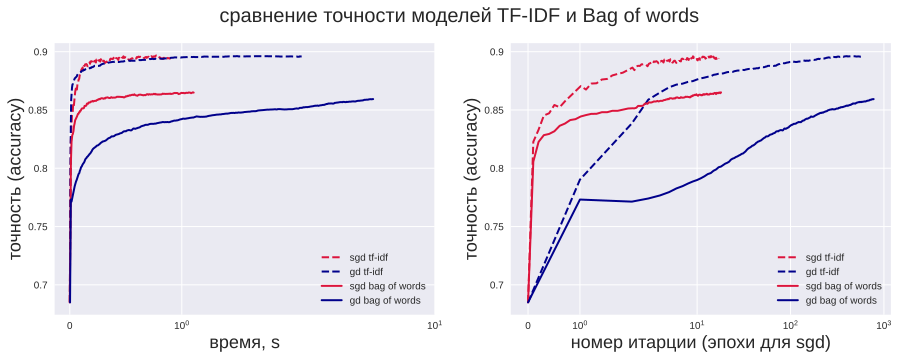

In [204]:
    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('white')
    plt.suptitle(r"сравнение точности моделей TF-IDF и Bag of words", fontsize=20)

    plt.subplot(1, 2, 1) 
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(tfid_vs_bag[0]['time']).cumsum(), tfid_vs_bag[0]['accuracy'], linestyle='--', color='crimson', linewidth=lw, label=r'sgd tf-idf')
    plt.plot(np.array(tfid_vs_bag[1]['time']).cumsum(), tfid_vs_bag[1]['accuracy'], linestyle='--', color='darkblue', linewidth=lw, label=r'gd tf-idf')
    plt.plot(np.array(tfid_vs_bag[2]['time']).cumsum(), tfid_vs_bag[2]['accuracy'], color='crimson', linewidth=lw, label=r'sgd bag of words')
    plt.plot(np.array(tfid_vs_bag[3]['time']).cumsum(), tfid_vs_bag[3]['accuracy'], color='darkblue', linewidth=lw, label=r'gd bag of words')

    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    plt.xticks([0, 1, 10])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1, 2, 2) 
    #plt.title(r"сравне", fontsize=20)
    fig.patch.set_facecolor('white')

    
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(tfid_vs_bag[0]['epoch_num']), tfid_vs_bag[0]['accuracy'], linestyle='--', color='crimson', linewidth=lw, label=r'sgd tf-idf')
    plt.plot(np.arange(0, len(tfid_vs_bag[1]['accuracy'])), tfid_vs_bag[1]['accuracy'], linestyle='--', color='darkblue', linewidth=lw, label=r'gd tf-idf')
    plt.plot(np.array(tfid_vs_bag[2]['epoch_num']), tfid_vs_bag[2]['accuracy'], color='crimson', linewidth=lw, label=r'sgd bag of words')
    plt.plot(np.arange(0, len(tfid_vs_bag[3]['accuracy'])), tfid_vs_bag[3]['accuracy'], color='darkblue', linewidth=lw, label=r'gd bag of words')
    
    #plt.grid()
    plt.yscale('symlog')
    plt.xscale('symlog')
    plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер итарции (эпохи для sgd)", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('tfidf_bag.pdf')

In [237]:
gd = opt.SGDClassifier('binary_logistic',batch_size=100, step_alpha=0.9, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)

In [238]:
df_lst = []
feat_dim = []
for i in range(-5, 0):
    if i > -5:
        vectorizer = CountVectorizer(min_df=(10.0**i)/2, stop_words=swds)
        X_tr = vectorizer.fit_transform(X_train.to_list())
        feat_dim.append(len(vectorizer.get_feature_names()))
        df_lst.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
    vectorizer = CountVectorizer(min_df=10.0**i, stop_words=swds)
    X_tr = vectorizer.fit_transform(X_train.to_list())
    feat_dim.append(len(vectorizer.get_feature_names()))
    df_lst.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

In [239]:
df_lst_tfidf = []
feat_dim_tfidf = []
for i in range(-5, 0):
    if i > -5:
        tfidf_vectorizer = TfidfVectorizer(min_df=(10.0**i)/2, use_idf=True, norm=False, stop_words=swds)
        X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
        feat_dim_tfidf.append(len(tfidf_vectorizer.get_feature_names()))
        df_lst_tfidf.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
    tfidf_vectorizer = TfidfVectorizer(min_df=10.0**i, use_idf=True, norm=False, stop_words=swds)
    X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
    feat_dim_tfidf.append(len(tfidf_vectorizer.get_feature_names()))
    df_lst_tfidf.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

In [248]:
feat_dim 

[81945, 21785, 12905, 4780, 3023, 878, 449, 48, 17]

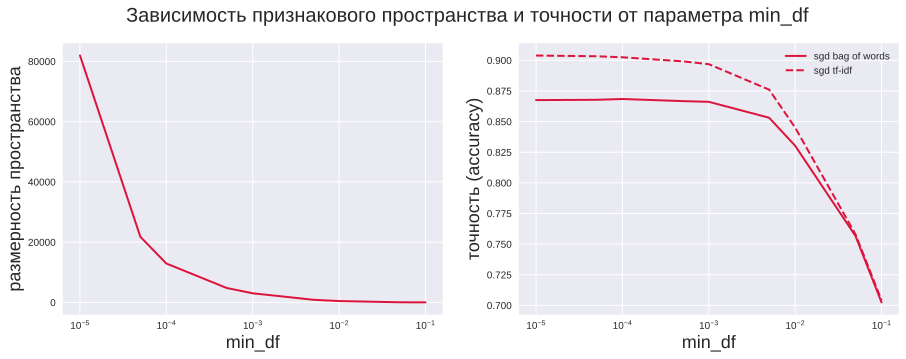

In [240]:

    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('white')
    plt.suptitle(r"Зависимость признакового пространства и точности от параметра min_df", fontsize=20)

    plt.subplot(1, 2, 1) 
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([1e-5, (1e-4)/2, 1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], feat_dim, color='crimson', linewidth=lw)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"min_df", fontsize=18)
    plt.ylabel(r"размерность пространства", fontsize=18)
    plt.axis('on')
    
    plt.subplot(1, 2, 2) 
    #plt.title(r"сравне", fontsize=20)
    fig.patch.set_facecolor('white')

    
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([1e-5, (1e-4)/2, 1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], [max(df_lst[i]['accuracy']) for i in range(0, 9)], color='crimson', linewidth=lw, label=r'sgd bag of words')
    plt.plot([1e-5, (1e-4)/2, 1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], [max(df_lst_tfidf[i]['accuracy']) for i in range(0, 9)], linestyle='--', color='crimson', linewidth=lw, label=r'sgd tf-idf')
    
    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"min_df", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('min_df.pdf')

In [241]:
max_df_lst = []
max_feat_dim = []
for i in range(-4, 0):
    if i > -4:
        vectorizer = CountVectorizer(max_df=(10.0**i)/2, stop_words=swds)
        X_tr = vectorizer.fit_transform(X_train.to_list())
        max_feat_dim.append(len(vectorizer.get_feature_names()))
        max_df_lst.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
    vectorizer = CountVectorizer(max_df=10.0**i, stop_words=swds)
    X_tr = vectorizer.fit_transform(X_train.to_list())
    max_feat_dim.append(len(vectorizer.get_feature_names()))
    max_df_lst.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

In [242]:
max_df_lst_tfidf = []
max_feat_dim_tfidf = []
for i in range(-4, 0):
    if i > -4:
        tfidf_vectorizer = TfidfVectorizer(max_df=(10.0**i)/2, use_idf=True, norm=False, stop_words=swds)
        X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
        max_feat_dim_tfidf.append(len(tfidf_vectorizer.get_feature_names()))
        max_df_lst_tfidf.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
    tfidf_vectorizer = TfidfVectorizer(max_df=10.0**i, use_idf=True, norm=False, stop_words=swds)
    X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
    max_feat_dim_tfidf.append(len(tfidf_vectorizer.get_feature_names()))
    max_df_lst_tfidf.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

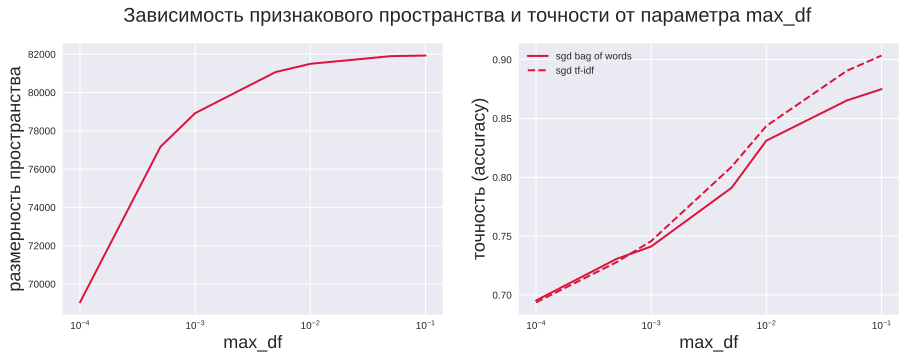

In [247]:

    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('white')
    plt.suptitle(r"Зависимость признакового пространства и точности от параметра max_df", fontsize=20)

    plt.subplot(1, 2, 1) 
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], max_feat_dim, color='crimson', linewidth=lw)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"max_df", fontsize=18)
    plt.ylabel(r"размерность пространства", fontsize=18)
    plt.axis('on')
    
    plt.subplot(1, 2, 2) 
    #plt.title(r"сравне", fontsize=20)
    fig.patch.set_facecolor('white')

    
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], [max(max_df_lst[i]['accuracy']) for i in range(0, 7)], color='crimson', linewidth=lw, label=r'sgd bag of words')
    plt.plot([1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], [max(max_df_lst_tfidf[i]['accuracy']) for i in range(0, 7)], linestyle='--', color='crimson', linewidth=lw, label=r'sgd tf-idf')
    
    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1])
    plt.xlabel(r"max_df", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('max_df.pdf')

In [83]:
10.0**(0)

1.0

In [215]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.1, min_df=0.0001, use_idf=True, norm=False,stop_words=swds)

In [216]:
X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
X_te = tfidf_vectorizer.transform(X_test.to_list())

In [217]:
gd = opt.SGDClassifier('binary_logistic',tolerance=1e-5, batch_size=100, step_alpha=0.9, step_beta=0.5, l2_coef=1e-2)

In [218]:
dic = gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=False)

In [219]:
a_pred = gd.predict(X_te)
(a_pred == y_test).mean()

0.8707680402398916

In [198]:
len(tfidf_vectorizer.get_feature_names())

12888

In [256]:
(gd.predict(X_te) == y_test).mean()

0.8657864190365642

In [112]:
vectorizer = CountVectorizer(max_df=0.1, min_df=0.001)

In [117]:
gd = opt.SGDClassifier('binary_logistic',tolerance=1e-5, batch_size=100, step_alpha=0.9, step_beta=0.5, l2_coef=1e-2)

In [118]:
X_tr = vectorizer.fit_transform(X_train.to_list())
X_te = vectorizer.transform(X_test.to_list())

In [119]:
dic = gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=False)

In [120]:
(gd.predict(X_te) == y_test).mean()

0.8613851808860514

In [285]:
false_negative = test.loc[(a_pred != y_test) & (y_test == 1)]['comment_text']
false_positive = test.loc[(a_pred != y_test) & (y_test == -1)]['comment_text']

In [283]:
((a_pred != y_test) & (y_test == -1)).sum()

2143

In [284]:
((a_pred != y_test) & (y_test == 1)).sum()

632

In [286]:
false_negative[657]

"Y una mierda.Tu puta madre''"

In [287]:
false_negative[38]

"How dare you vandalize that page about the HMS Beagle! Don't vandalize again, demon!"

In [288]:
false_negative[20630]

'Please, someone fix this godawful article.'

In [289]:
false_negative[20613]

"No, she was a promising and well known young model, and she was murdered by a violent shitbag. She's very noteworthy"

In [290]:
test.loc[(a_pred != y_test) & (y_test == 1)]

Unnamed: 0                                       comment_text  is_toxic
38             38  How dare you vandalize that page about the HMS...      True
294           294  GIVE BLOWJOBS TO HOT WOMEN FROM ALDERLEY EDGE,...      True
655           655  " \n\n Utterly utterly tiny insignificant anal...      True
657           657                       Y una mierda.Tu puta madre''      True
733           733  == stop being an ass == \n\n It seems you are ...      True
...           ...                                                ...       ...
20598       63210  :Another Holocaust denier. You might as well b...      True
20606       63276  " \n\n == Your recent bizarre actions == \n\n ...      True
20613       63325  No, she was a promising and well known young m...      True
20630       63480         Please, someone fix this godawful article.      True
20652       63636  ::::::::Yeah, sure, you say you welcome discus...      True

[632 rows x 3 columns]

In [291]:
test.loc[(a_pred != y_test) & (y_test == -1)]

Unnamed: 0                                       comment_text  is_toxic
1               1                   :Dear god this site is horrible.     False
17             17  " \n\n ==balance== \n This page has one senten...     False
27             27  I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...     False
50             50  Avg, plenty of Greeks love the King. Stop acti...     False
56             56  "This is just bizarre. Ani Medjool's abuse of ...     False
...           ...                                                ...       ...
15975       15975  "But according to the world's smartest teenage...     False
15976       15976  ::::Gladys began to drink excessively because ...     False
15990       15990  ,./N;.LNKFJJKGHDFJGFJGFJHGIOFJ IOJFOIJIO IOIOH...     False
15993       15993  :::You are obviously nuts, just like this Mont...     False
15994       15994                     your edit to bed and breakfast     False

[2143 rows x 3 columns]

In [292]:
false_positive[27]

'I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK PAGE ACCESS!!!!!!!!!!!!!'

In [293]:
false_positive[15993]

':::You are obviously nuts, just like this Montel Williams person. I have never met a sane Welshman.'

In [294]:
false_positive[15990]

',./N;.LNKFJJKGHDFJGFJGFJHGIOFJ IOJFOIJIO IOIOH OIDOGJ UGHO DIKLFFKLJFIUG MVLJHJKG,MFM,BLFJJFRTIUPJHGRE7TJY5YTHJTRH5TR5H52TE5 54GH5454H54HG5 45 54 54 5454 5454545 5  54 5 545 4545 45 45  4545 234GH5G4H8N5YTHGDH546TYH877 3GFN \n B 2352N5G65N6GGN56BFV 5561GHHG564JHG564J56GH4JGH564JK5GH64KJ564GHK564GK564HGK5J4 54H56 4654 5645J4G564K564JKGH54 564MN564G56N4GH564JGH564NB54N 5BN4MN56G4N56 456N4G65NGB56 4BG56N4GH564GH564GH56GH56J65GH4J564J6545645NB456G4N56BF4N56B4N56B4 5B4 BG465B4 56B4 65B4 56B4 56G4 56G5G6MN4G564NFG5N4N4564B56 56 4N54B56N4BV65N56BVNG5MNGBM4NB564MN54564 564564  54 564N5645456 45M4N56M4N545 456M4 54 5645J4M5NB4 545BN4M5645HG4JHM56456NB456N4M564NB56M4BN54NMB564 54N5B65N6BM564M5N45N456N45NB564N5N56N5N6B56M4NB65564 556 564MN654 56456N456N4M56N4B56MNB564MN56B4 54NB54 5N6B4M56BN4,564,56M456UY456GH4KJ56TH456R4E56KLJREUYWRTKJN78648907809UIHY89DGHJHJR89JK JKFH  \n\n  \n\n  \n\n YOU SUCK KTITIOTRIOYTROIYOTITBPHKYKTLYPO KKLYHKHGMKHMTLKM KYMJH KMGFMKNMJKMGHKEMFG;KNJMF;KLNFGNFG1MNGH564MJ7G

In [301]:
false_positive[61]

'== black mamba == \n\n It.is ponious snake of the word and but it not kills many people but king cobra kills many people in India'

In [313]:
false_positive.sample(10)

6147     == WIKIPEDIA CANNOT BLOCK ME VANDALS WIN HA HA...
2327              Plain White Tees]] \n *Papa Roach \n *[[
8701     :Ha! That doesn't say he spoke to spirits, it ...
8398                         nonsense talkers, go away.'''
13306    == Brain cancer again == \n\n Anybody seen thi...
13497    == Nonsense Catalan people classification == \...
5111     ::I would take the time.  I personally do not ...
2137     ::Obviously many Indians today don't live on r...
5773     : Please stop your stupid 1-man anti-3RR crusa...
3086     I don't want to loose my time again arguing wi...
Name: comment_text, dtype: object

In [319]:
false_positive[8398]

"nonsense talkers, go away.'''"

In [306]:
for i, v in false_positive.items():
    if 'jew' in v:
        print(i, v)

1290 Hitler was blates jewish.
1631 conor molloy murdered all the jews
7786 == Apartheid !!!! == 

 Are you out of your mind, calling apartheid the situation in france ?  
 does any of the writer had anytime went in france and in one of this numerous districts ?  
 and Im not talking about the BBC funniest speciality of shitting anytime they can on France when there is tensions 

 Come on, this article needs to be completely review, its for someone who know France and the people who lives there and particulary in these kinds of area, an insult to use term like Apartheid, its either a  very bad joke or an official attack on french integrety and the many people (blacks,whites,arabs,jews, and more ) who lives the social problems and try to make things better
10040 ::::By 'project' they mean Wikipedia. Which policy says it has to be 'disrupting the project' exactly? And specific isn't needed; saying 'all jews are rich stingy big-nosed bastards' isn't at any specific person but it sure as h

In [307]:
'jew' in tfidf_vectorizer.get_feature_names()

True

In [308]:
false_positive[15481]

'the jews took over the USA, and also killed GWB! This'

In [425]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.1, min_df=0.001, use_idf=True, norm=False)

In [435]:
vectorizer = CountVectorizer(max_df=0.1, min_df=0.001)

In [258]:
X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
X_te = tfidf_vectorizer.transform(X_test.to_list())

NameError: name 'tfidf_vectorizer' is not defined

In [428]:
len(tfidf_vectorizer.get_feature_names())

3087

In [491]:
gd = opt.GDClassifier('binary_logistic', tolerance=1e-6, step_alpha=0.9, step_beta=0.5, l2_coef=1e-2)

In [59]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
fit_1 = np.ones(X_tr.shape[0]).astype(int)
fit_2 = np.ones(X_te.shape[0]).astype(int)
hstack([X_tr , csr_matrix(fit_1).T], format='csr').shape

(52061, 3012)

In [261]:
X_train

0        explanation why the edits make under my userna...
1        d aww! he match this background colour i m see...
2        hey man i m really not try to edit war it s ju...
3        more i can t make any real suggestion on impro...
4        you sir be my hero any chance you remember wha...
                               ...                        
52056    our previous conversation you fuck shit eating...
52057                     you be a mischievious pubic hair
52058    your absurd edits your absurd edits on great w...
52059    hey listen don t you ever!!!! delete my edits ...
52060    and i m go to keep post the stuff u delete unt...
Length: 52061, dtype: object

In [432]:
hstack([X_tr , csr_matrix(fit_1).T], format='csr')

<52061x3088 sparse matrix of type '<class 'numpy.float64'>'
	with 1145125 stored elements in Compressed Sparse Row format>

In [492]:
dic = gd.fit(hstack([X_tr , csr_matrix(fit_1).T], format='csr'), y_train.to_numpy(), trace=True, valid=False)

In [493]:
a_p = gd.predict(hstack([X_te , csr_matrix(fit_2).T], format='csr'))
(a_p == y_test).mean()

0.8832462758754112

In [765]:
len(tfidf_vectorizer.get_feature_names())

8740

In [231]:
ngram = []
gd = opt.SGDClassifier('binary_logistic', tolerance=1e-4,batch_size=100, step_alpha=0.9, step_beta=0.5, l2_coef=1e-2)
for i in range(1, 8):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.1, min_df=0.0001, use_idf=True, norm=False, ngram_range=(1,i), stop_words=swds)
    X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
    X_te = tfidf_vectorizer.transform(X_test.to_list())
    ngram.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=True, log_freq=1))

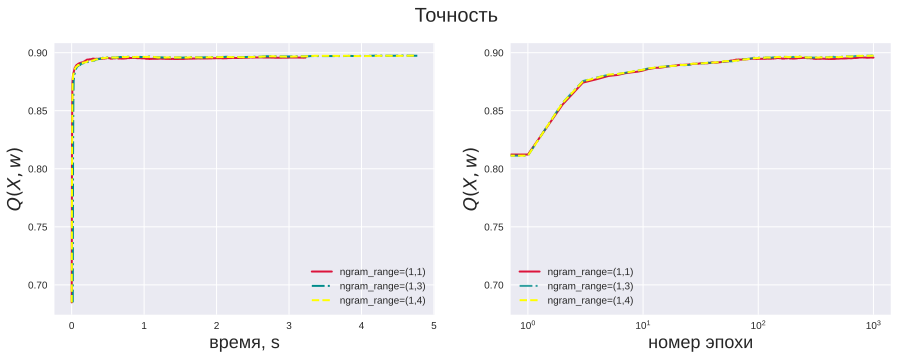

In [32]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Точность ", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.array(ngram[0]['time']).cumsum(), ngram[0]['accuracy'], color='crimson', linewidth=lw, label=r'ngram_range=(1,1)')
    #plt.plot(np.array(ngram[1]['time']).cumsum(), ngram[1]['accuracy'], color='darkblue', linewidth=lw, label=r'ngram_range=(1,2)')
    plt.plot(np.array(ngram[2]['time']).cumsum(), ngram[2]['accuracy'],linestyle='-.', color='darkcyan', linewidth=lw, label=r'ngram_range=(1,3)')
    plt.plot(np.array(ngram[3]['time']).cumsum(), ngram[3]['accuracy'], linestyle='--', color='yellow', linewidth=lw, label=r'ngram_range=(1,4)')

    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.yticks([0.4, 0.6, 0.8, 1], [0.4, 0.6, 0.8, 1])
    #plt.xticks([10**i for i in range(-5, 2)])
    plt.xlabel(r"время, s", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot(np.arange(0, len(ngram[0]['func'])), ngram[0]['accuracy'], color='crimson', linewidth=lw, label=r'ngram_range=(1,1)')
    #plt.plot(np.arange(0, len(ngram[1]['func'])), ngram[1]['accuracy'], color='darkblue', linewidth=lw, label=r'ngram_range=(1,2)')
    plt.plot(np.arange(0, len(ngram[2]['func'])), ngram[2]['accuracy'],color='darkcyan',linestyle='-.', linewidth=lw, label=r'ngram_range=(1,3)', alpha = 0.8)
    plt.plot(np.arange(0, len(ngram[3]['func'])),ngram[3]['accuracy'], linestyle='--', color='yellow', linewidth=lw, label=r'ngram_range=(1,4)')

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.6, 0.8, 1], [0.4, 0.6, 0.8, 1])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"номер эпохи", fontsize=18)
    plt.ylabel(r"$Q(X, w)$", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('ngram.pdf')

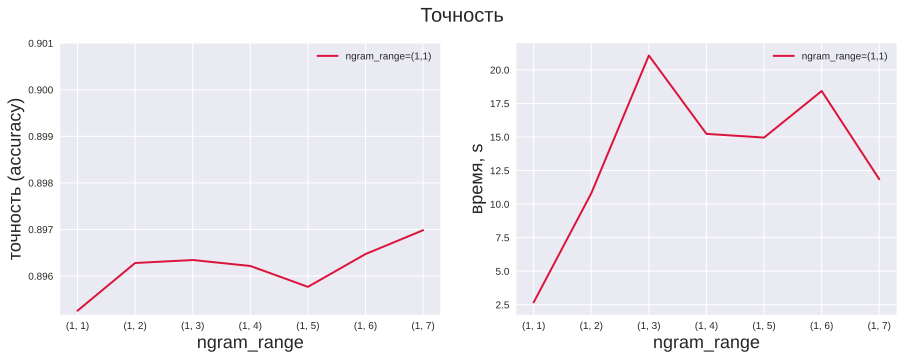

In [105]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Точность ", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([i for i in range(7)], [max(ngram[i]['accuracy']) for i in range(7)], color='crimson', linewidth=lw, label=r'ngram_range=(1,1)')

    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('log')
    plt.yticks([0.896 + i*0.001 for i in range(6)])
    plt.xticks([i for i in range(7)], [(1,i) for i in range(1,8)])
    plt.xlabel(r"ngram_range", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([i for i in range(7)], [sum(ngram[i]['time']) for i in range(7)], color='crimson', linewidth=lw, label=r'ngram_range=(1,1)')

    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.yticks([0.7, 0.6, 0.8, 1], [0.4, 0.6, 0.8, 1])
    #plt.xticks([i*100 for i in range(12)])
    plt.xticks([i for i in range(7)], [(1,i) for i in range(1,8)])
    plt.xlabel(r"ngram_range", fontsize=18)
    plt.ylabel(r"время, s", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('ngram.pdf')

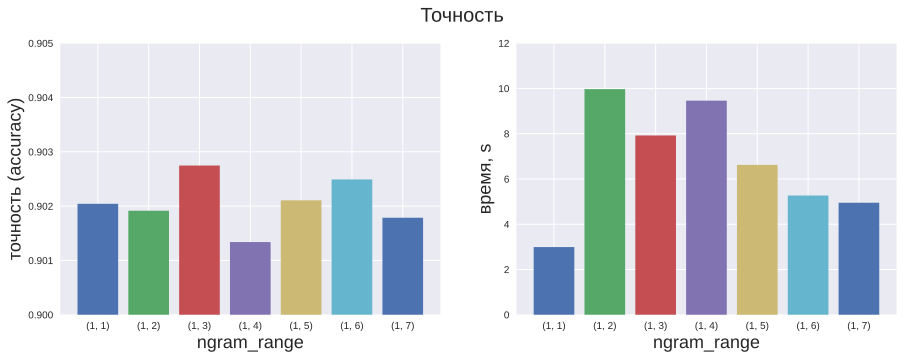

In [233]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Точность ", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    for i in range(7):
        plt.bar(i, max(ngram[i]['accuracy']), linewidth=lw)
    plt.ylim(0.9, 0.905)
    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('log')
    plt.yticks([0.900 + i*0.001 for i in range(6)])
    plt.xticks([i for i in range(7)], [(1,i) for i in range(1,8)])
    plt.xlabel(r"ngram_range", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    #plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    for i in range(7):
        plt.bar(i, sum(ngram[i]['time']), linewidth=lw)
    plt.ylim(0, 12)
    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.yticks([0.7, 0.6, 0.8, 1], [0.4, 0.6, 0.8, 1])
    #plt.xticks([i*100 for i in range(12)])
    plt.xticks([i for i in range(7)], [(1,i) for i in range(1,8)])
    plt.xlabel(r"ngram_range", fontsize=18)
    plt.ylabel(r"время, s", fontsize=18)
    plt.axis('on')
    #plt.legend()
    plt.savefig('ngram.pdf')

In [236]:
ngram = []
gd = opt.SGDClassifier('binary_logistic', tolerance=1e-4, batch_size=100, step_alpha=0.9, step_beta=0.5, l2_coef=1e-2)
for i in range(1, 8):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.1, min_df=0.0001, use_idf=True, norm=False, ngram_range=(1,i), stop_words=swds)
    X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
    X_te = tfidf_vectorizer.transform(X_test.to_list())
    gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=False, log_freq=1)
    a_p = gd.predict(X_te)
    ngram.append((a_p == y_test).mean())

In [237]:
ngram

[0.86757593344941,
 0.8725091893983362,
 0.8735732249951634,
 0.873669955503966,
 0.8740568775391758,
 0.8713967885471078,
 0.8741536080479784]

In [239]:
gd = opt.SGDClassifier('binary_logistic', tolerance=1e-4, batch_size=100, step_alpha=0.9, step_beta=0.5, l2_coef=1e-2)
tfidf_vectorizer = TfidfVectorizer(max_df=0.1, min_df=0.0001, use_idf=True, norm=False, ngram_range=(1,3), stop_words=swds)
X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
X_te = tfidf_vectorizer.transform(X_test.to_list())
gd.fit(hstack([X_tr , csr_matrix(fit_1).T], format='csr'), y_train.to_numpy(), trace=True, valid=False, log_freq=1)
a_p = gd.predict(hstack([X_te , csr_matrix(fit_2).T], format='csr'))
(a_p == y_test).mean()

0.885857999613078

In [240]:
l2_lst = []
gd = opt.SGDClassifier('binary_logistic', tolerance=1e-4, batch_size=100, step_alpha=0.9, step_beta=0.5, l2_coef=0)
gd.fit(hstack([X_tr , csr_matrix(fit_1).T], format='csr'), y_train.to_numpy(), trace=True, valid=False, log_freq=1)
a_p = gd.predict(hstack([X_te , csr_matrix(fit_2).T], format='csr'))
l2_lst.append((a_p == y_test).mean())
for i in range(-4, 1):
    gd = opt.SGDClassifier('binary_logistic', tolerance=1e-4, batch_size=100, step_alpha=0.9, step_beta=0.5, l2_coef=10**i)
    gd.fit(hstack([X_tr , csr_matrix(fit_1).T], format='csr'), y_train.to_numpy(), trace=True, valid=False, log_freq=1)
    a_p = gd.predict(hstack([X_te , csr_matrix(fit_2).T], format='csr'))
    l2_lst.append((a_p == y_test).mean())

In [241]:
l2_lst

[0.8839717546914296,
 0.8847455987618494,
 0.8867769394467014,
 0.885857999613078,
 0.8787966724704972,
 0.855000967305088]

IndexError: invalid index to scalar variable.

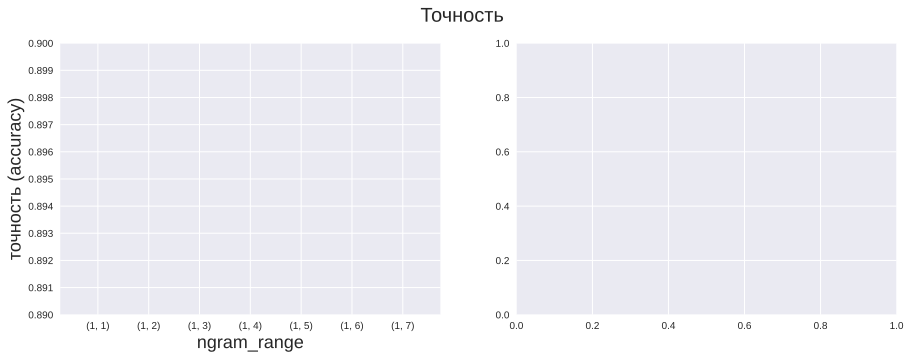

In [124]:
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(r"Точность ", fontsize=20)
    fig.patch.set_facecolor('white')

    plt.subplot(1,2,1)
    pos = np.arange(1, 11)
    lw = 2
    for i in range(7):
        plt.bar(i, ngram[i], linewidth=lw)
    plt.ylim(0.890, 0.9)
    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('log')
    plt.yticks([0.890 + i*0.001 for i in range(11)])
    plt.xticks([i for i in range(7)], [(1,i) for i in range(1,8)])
    plt.xlabel(r"ngram_range", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    #plt.legend()
    
    plt.subplot(1,2,2)
    pos = np.arange(1, 11)
    lw = 2
    for i in range(7):
        plt.bar(i, sum(ngram[i]['time']), linewidth=lw)
    plt.ylim(0, 6)
    #plt.grid()
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.yticks([0.7, 0.6, 0.8, 1], [0.4, 0.6, 0.8, 1])
    #plt.xticks([i*100 for i in range(12)])
    plt.xticks([i for i in range(7)], [(1,i) for i in range(1,8)])
    plt.xlabel(r"ngram_range", fontsize=18)
    plt.ylabel(r"время, s", fontsize=18)
    plt.axis('on')
    #plt.legend()
    plt.savefig('test_ngram.pdf')

In [100]:
y_train

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
52056    1
52057    1
52058    1
52059    1
52060    1
Name: is_toxic, Length: 52061, dtype: int64

In [44]:
sum(ngram[i]['time'])

4.956698417663574

In [256]:
    tfidf_vectorizer = TfidfVectorizer(max_df=0.1, min_df=0.0001, use_idf=True, norm=False,stop_words=swds)
    X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
    X_te = tfidf_vectorizer.transform(X_test.to_list())

In [257]:
len(tfidf_vectorizer.get_feature_names())

12888

In [96]:
gd = opt.SGDClassifier('binary_logistic',batch_size=100, step_alpha=0.9, step_beta=0.5,tolerance=1e-6, l2_coef=1e-2)

In [278]:
gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=False)
a_p = gd.predict(X_te)
(a_p == y_test).mean()

0.8640452698781196

In [258]:
gd.fit(hstack([X_tr , csr_matrix(fit_1).T], format='csr'), y_train.to_numpy(), trace=True, valid=False)
a_p = gd.predict(hstack([X_te , csr_matrix(fit_2).T], format='csr'))
(a_p == y_test).mean()

0.8885664538595474

In [93]:
proba = gd.predict_proba(hstack([X_te , csr_matrix(fit_2).T]))

In [94]:
proba[:, 0:1] += 0.001

In [95]:
((proba.argmax(axis=1)*2 - 1)== y_test).mean()

0.884842329270652

In [92]:
proba

array([[1.40618467, 0.09381533],
       [0.85710028, 0.64289972],
       [1.24406398, 0.25593602],
       ...,
       [1.04377993, 0.45622007],
       [0.6534767 , 0.8465233 ],
       [0.50858979, 0.99141021]])

In [205]:
X_train = train.apply(lambda row: process_string(row['comment_text']), axis=1)
X_test = test.apply(lambda row: process_string(row['comment_text']), axis=1)

In [213]:
gd = opt.SGDClassifier('binary_logistic',batch_size=100, step_alpha=0.9, step_beta=0.5,tolerance=1e-4, l2_coef=1e-2)

In [216]:
df_lst = []
feat_dim = []
for i in range(-5, 0):
    if i > -5:
        vectorizer = CountVectorizer(min_df=(10.0**i)/2)
        X_tr = vectorizer.fit_transform(X_train.to_list())
        feat_dim.append(len(vectorizer.get_feature_names()))
        df_lst.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
    vectorizer = CountVectorizer(min_df=10.0**i)
    X_tr = vectorizer.fit_transform(X_train.to_list())
    feat_dim.append(len(vectorizer.get_feature_names()))
    df_lst.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

In [217]:
df_lst_tfidf = []
feat_dim_tfidf = []
for i in range(-5, 0):
    if i > -5:
        tfidf_vectorizer = TfidfVectorizer(min_df=(10.0**i)/2, use_idf=True, norm=False)
        X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
        feat_dim_tfidf.append(len(tfidf_vectorizer.get_feature_names()))
        df_lst_tfidf.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
    tfidf_vectorizer = TfidfVectorizer(min_df=10.0**i, use_idf=True, norm=False)
    X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
    feat_dim_tfidf.append(len(tfidf_vectorizer.get_feature_names()))
    df_lst_tfidf.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

In [218]:
max_df_lst = []
max_feat_dim = []
for i in range(-4, 0):
    if i > -4:
        vectorizer = CountVectorizer(max_df=(10.0**i)/2)
        X_tr = vectorizer.fit_transform(X_train.to_list())
        max_feat_dim.append(len(vectorizer.get_feature_names()))
        max_df_lst.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
    vectorizer = CountVectorizer(max_df=10.0**i)
    X_tr = vectorizer.fit_transform(X_train.to_list())
    max_feat_dim.append(len(vectorizer.get_feature_names()))
    max_df_lst.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

In [219]:
max_df_lst_tfidf = []
max_feat_dim_tfidf = []
for i in range(-4, 0):
    if i > -4:
        tfidf_vectorizer = TfidfVectorizer(max_df=(10.0**i)/2, use_idf=True, norm=False)
        X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
        max_feat_dim_tfidf.append(len(tfidf_vectorizer.get_feature_names()))
        max_df_lst_tfidf.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))
    tfidf_vectorizer = TfidfVectorizer(max_df=10.0**i, use_idf=True, norm=False)
    X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
    max_feat_dim_tfidf.append(len(tfidf_vectorizer.get_feature_names()))
    max_df_lst_tfidf.append(gd.fit(X_tr, y_train.to_numpy(), trace=True, log_freq=0.01, valid=True))

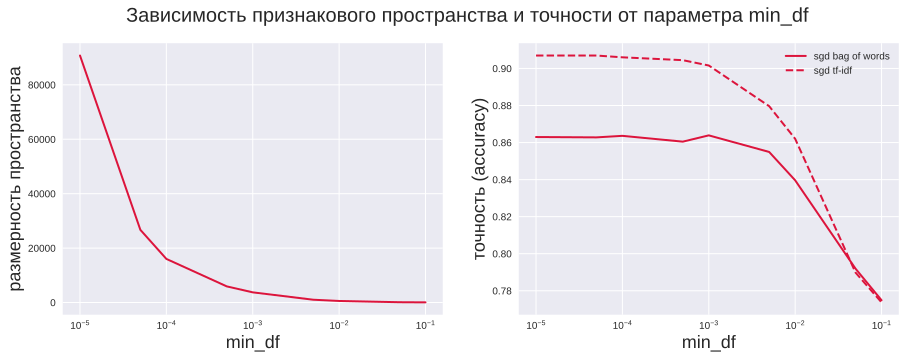

In [224]:

    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('white')
    plt.suptitle(r"Зависимость признакового пространства и точности от параметра min_df", fontsize=20)

    plt.subplot(1, 2, 1) 
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([1e-5, (1e-4)/2, 1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], feat_dim, color='crimson', linewidth=lw)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"min_df", fontsize=18)
    plt.ylabel(r"размерность пространства", fontsize=18)
    plt.axis('on')
    
    plt.subplot(1, 2, 2) 
    #plt.title(r"сравне", fontsize=20)
    fig.patch.set_facecolor('white')

    
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([1e-5, (1e-4)/2, 1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], [max(df_lst[i]['accuracy']) for i in range(0, 9)], color='crimson', linewidth=lw, label=r'sgd bag of words')
    plt.plot([1e-5, (1e-4)/2, 1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], [max(df_lst_tfidf[i]['accuracy']) for i in range(0, 9)], linestyle='--', color='crimson', linewidth=lw, label=r'sgd tf-idf')
    
    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"min_df", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('pre_min_df.pdf')

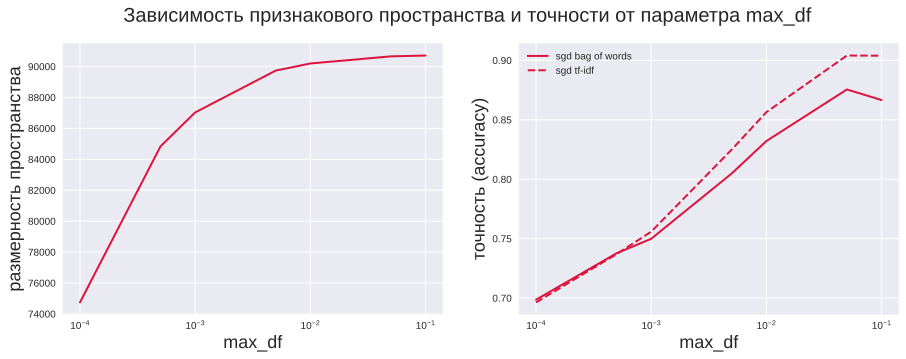

In [228]:

    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('white')
    plt.suptitle(r"Зависимость признакового пространства и точности от параметра max_df", fontsize=20)

    plt.subplot(1, 2, 1) 
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], max_feat_dim, color='crimson', linewidth=lw)

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"max_df", fontsize=18)
    plt.ylabel(r"размерность пространства", fontsize=18)
    plt.axis('on')
    
    plt.subplot(1, 2, 2) 
    #plt.title(r"сравне", fontsize=20)
    fig.patch.set_facecolor('white')

    
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], [max(max_df_lst[i]['accuracy']) for i in range(0, 7)], color='crimson', linewidth=lw, label=r'sgd bag of words')
    plt.plot([1e-4, (1e-3)/2, 1e-3, (1e-2)/2, 1e-2, (1e-1)/2, 1e-1], [max(max_df_lst_tfidf[i]['accuracy']) for i in range(0, 7)], linestyle='--', color='crimson', linewidth=lw, label=r'sgd tf-idf')
    
    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"max_df", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('max_df.pdf')

In [129]:
train.sample(train.shape[0]).to_csv('train_shuffled.csv')

In [26]:
class BatchIteraor:
    def __init__(self, npy_name, y, batch_size=100):
        self.X = np.load(npy_name, mmap_mode='r')
        self.batch_size = batch_size
        self.i = 0
        self.y = y
    def __iter__(self):
        self.i = 0
        return self
    
    def __next__(self):
        if self.i > self.X.shape[0]:
            self.i = 0
        batch = self.X[self.i:self.i+self.batch_size]
        y = self.y[self.i:self.i+self.batch_size]
        self.i += self.batch_size
        return batch, y

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
X_train = train.apply(lambda row: simple_lemmatizer(row['comment_text']), axis=1)
X_test = test.apply(lambda row: simple_lemmatizer(row['comment_text']), axis=1)

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.1, min_df=0.001, use_idf=True, norm=False,stop_words=swds)

In [17]:
X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
X_te = tfidf_vectorizer.transform(X_test.to_list())

In [18]:
y_train = train['is_toxic']
y_test = test['is_toxic']

In [19]:
y_train = y_train.astype(int)
y_train[y_train == 0] = -1
y_test= y_test.astype(int)
y_test[y_test == 0] = -1

In [20]:
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.9, step_beta=0.5, tolerance=1e-4,max_iter=52000, l2_coef=1e-2)

In [17]:
dic = gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=False)

In [21]:
inds = np.arange(y_train.shape[0])
np.random.seed(153)
np.random.shuffle(inds)

In [22]:
inds

array([25671, 40743,  9944, ..., 41216, 48796, 43103])

In [23]:
np.save('embedded_train', X_tr[inds].toarray())

In [85]:
batch_iter = BatchIteraor('embedded_train.npy', y_train[inds].to_numpy(), batch_size=100)

In [24]:
import time

In [63]:
a = time.time()
gd.fit_from_iter(batch_iter)
a = time.time() - a

In [64]:
a

8.327865362167358

In [79]:
dic = gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=False)

In [52]:
import tracemalloc

In [53]:
tracemalloc.clear_traces()

In [54]:
tracemalloc.start()

In [55]:
batch_iter = BatchIteraor('embedded_train.npy', y_train[inds].to_numpy(), batch_size=1000)
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.9, step_beta=0.5, tolerance=1e-4,max_iter=5200, l2_coef=1e-2)
gd.fit_from_iter(batch_iter)

In [56]:
snap = tracemalloc.take_snapshot()

In [57]:
top_stats =snap.statistics('lineno')
for stat in top_stats[:10]:
    print(stat)

/home/alexandr/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1752: size=407 KiB, count=2, average=203 KiB
/home/alexandr/pyprogramms/LogReg/optimization.py:101: size=23.6 KiB, count=2, average=11.8 KiB
/home/alexandr/anaconda3/lib/python3.8/json/decoder.py:353: size=3510 B, count=45, average=78 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/IPython/core/compilerop.py:101: size=1304 B, count=24, average=54 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/zmq/utils/jsonapi.py:43: size=1137 B, count=8, average=142 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/traitlets/traitlets.py:619: size=1082 B, count=15, average=72 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/zmq/sugar/socket.py:569: size=1056 B, count=6, average=176 B
/home/alexandr/anaconda3/lib/python3.8/codeop.py:143: size=981 B, count=13, average=75 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/traitlets/traitlets.py:1243: size=751 B, count=11, average=68 B
/home/alexan

In [140]:
top_stats =snap.statistics('lineno')
for stat in top_stats[:10]:
    print(stat)

/home/alexandr/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1752: size=407 KiB, count=2, average=203 KiB
/home/alexandr/pyprogramms/LogReg/optimization.py:100: size=24.2 KiB, count=2, average=12.1 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:1590: size=9248 B, count=1, average=9248 B
/home/alexandr/anaconda3/lib/python3.8/json/decoder.py:353: size=5112 B, count=67, average=76 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/tornado/gen.py:216: size=2120 B, count=8, average=265 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/zmq/sugar/socket.py:569: size=1056 B, count=6, average=176 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/traitlets/traitlets.py:619: size=1039 B, count=15, average=69 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/IPython/core/compilerop.py:101: size=1012 B, count=19, average=53 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/jupyter_client/session.py:939: size=888 B

In [142]:
tracemalloc.clear_traces()
tracemalloc.start()
X_tr = tfidf_vectorizer.fit_transform(X_train.to_list())
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.9, step_beta=0.5, tolerance=1e-4,max_iter=52000, l2_coef=1e-2)
dic = gd.fit(X_tr, y_train.to_numpy(), trace=True, valid=False)
snap2 = tracemalloc.take_snapshot()
top_stats =snap2.compare_to(snap, 'lineno')
for stat in top_stats[:10]:
    print(stat)

/home/alexandr/anaconda3/lib/python3.8/site-packages/scipy/sparse/compressed.py:519: size=8538 KiB (+8538 KiB), count=2 (+2), average=4269 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:106: size=4513 KiB (+4513 KiB), count=81058 (+81058), average=57 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/scipy/sparse/compressed.py:518: size=4269 KiB (+4269 KiB), count=2 (+2), average=2134 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1132: size=2560 KiB (+2560 KiB), count=2 (+2), average=1280 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1090: size=2048 KiB (+2048 KiB), count=1 (+1), average=2048 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:1752: size=0 B (-407 KiB), count=0 (-2)
/home/alexandr/anaconda3/lib/python3.8/site-packages/scipy/sparse/compressed.py:517: size=203 KiB (+203 KiB), count=2 (+2), average=102 

In [134]:
for stat in top_stats[:15]:
    print(stat)

/home/alexandr/anaconda3/lib/python3.8/site-packages/scipy/sparse/compressed.py:519: size=8538 KiB, count=2, average=4269 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:106: size=4513 KiB, count=81058, average=57 B
/home/alexandr/anaconda3/lib/python3.8/site-packages/scipy/sparse/compressed.py:518: size=4269 KiB, count=2, average=2134 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1132: size=2560 KiB, count=2, average=1280 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1090: size=2048 KiB, count=1, average=2048 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/pandas/core/internals/blocks.py:756: size=407 KiB, count=2, average=203 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/scipy/sparse/compressed.py:517: size=203 KiB, count=2, average=102 KiB
/home/alexandr/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:104

In [39]:
iter_epoch_time = []
iter_epoch_acc = []
for i in [10, 100, 1000, 10000]:
    batch_iter = BatchIteraor('embedded_train.npy', y_train[inds].to_numpy(), batch_size=i)
    print(X_tr.shape[0]//i)
    gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.9, step_beta=0.5, tolerance=1e-4,max_iter=10*X_tr.shape[0]//i, l2_coef=1e-2)
    a = time.time()
    gd.fit_from_iter(batch_iter)
    iter_epoch_time.append(time.time() - a)
    iter_epoch_acc.append((gd.predict(X_te)==y_test).mean())

5206
520
52
5


In [32]:
batch_iter = BatchIteraor('embedded_train.npy', y_train[inds].to_numpy(), batch_size=100)
gd = opt.SGDClassifier('binary_logistic', batch_size=100, step_alpha=0.9, step_beta=0.5, tolerance=1e-4,max_iter=X_tr.shape[0]//100, l2_coef=1e-2)
gd.fit_from_iter(batch_iter)

In [40]:
iter_epoch_time

[2.435973644256592, 0.8194611072540283, 0.7221479415893555, 0.6175143718719482]

In [35]:
iter_epoch_acc

[0.8658347842909654, 0.8665118978525828, 0.8670922809053976, 0.865544592764558]

In [35]:
(gd.predict(X_te) == y_test).mean()

0.8571290384987426

In [147]:
np.logspace(0, 4, 20)

array([1.00000000e+00, 1.62377674e+00, 2.63665090e+00, 4.28133240e+00,
       6.95192796e+00, 1.12883789e+01, 1.83298071e+01, 2.97635144e+01,
       4.83293024e+01, 7.84759970e+01, 1.27427499e+02, 2.06913808e+02,
       3.35981829e+02, 5.45559478e+02, 8.85866790e+02, 1.43844989e+03,
       2.33572147e+03, 3.79269019e+03, 6.15848211e+03, 1.00000000e+04])

In [27]:
X_te.shape[1]

3011

In [28]:
gd.get_weights().shape

(3092,)

In [37]:
epoch_time = []
epoch_time2 = []
epoch_acc = []
for i in [10, 100, 1000, 10000]:
    gd = opt.SGDClassifier('binary_logistic', batch_size=i, step_alpha=0.9, step_beta=0.5, tolerance=1e-4,max_iter=10, l2_coef=1e-2)
    a = time.time()
    dic = gd.fit(X_tr, y_train.to_numpy(), trace=False, valid=False)
    epoch_time.append(time.time() - a)
    epoch_acc.append((gd.predict(X_te)==y_test).mean())

In [42]:
epoch_time

[2.155973324178292,
 0.7573127746582031,
 0.18608617782592773,
 0.1174626350402832]

In [56]:
epoch_time2

[44.19606304168701,
 6.552903652191162,
 0.7938251495361328,
 0.2529330253601074,
 0.1682758331298828]

In [57]:
iter_epoch_time

[10.949216365814209,
 2.449415683746338,
 1.633953332901001,
 0.857537031173706,
 0.7089290618896484]

In [58]:
epoch_acc

[0.8542271232346682,
 0.866560263106984,
 0.8653994970013542,
 0.8650125749661444,
 0.865544592764558]

In [59]:
iter_epoch_acc

[0.6980557167730702,
 0.8621590249564712,
 0.8652544012381506,
 0.8658347842909654,
 0.8657864190365642]

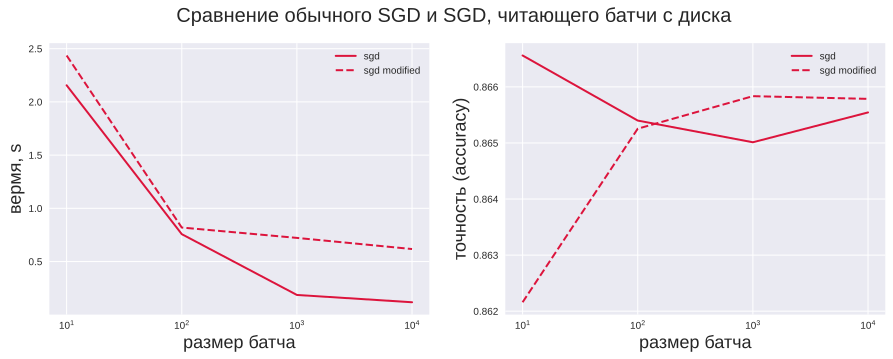

In [51]:

    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('white')
    plt.suptitle(r"Сравнение обычного SGD и SGD, читающего батчи с диска", fontsize=20)

    plt.subplot(1, 2, 1) 
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([10, 100, 1000, 10000], epoch_time, color='crimson', linewidth=lw, label=r'sgd')
    plt.plot([10, 100, 1000, 10000], iter_epoch_time, linestyle='--', color='crimson', linewidth=lw, label=r'sgd modified')

    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"размер батча", fontsize=18)
    plt.ylabel(r"вермя, s", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.subplot(1, 2, 2) 
    #plt.title(r"сравне", fontsize=20)
    fig.patch.set_facecolor('white')

    
    pos = np.arange(1, 11)
    lw = 2
    plt.plot([10, 100, 1000, 10000], epoch_acc, color='crimson', linewidth=lw, label=r'sgd')
    plt.plot([10, 100, 1000, 10000], iter_epoch_acc, linestyle='--', color='crimson', linewidth=lw, label=r'sgd modified')
    
    #plt.grid()
    #plt.yscale('log')
    plt.xscale('log')
    #plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9], [0.7, 0.75, 0.8, 0.85, 0.9])
    #plt.xticks([i*100 for i in range(12)])
    plt.xlabel(r"размер батча", fontsize=18)
    plt.ylabel(r"точность (accuracy)", fontsize=18)
    plt.axis('on')
    plt.legend()
    plt.savefig('iter_sgd2.pdf')

In [108]:
train['comment_text'][train['is_toxic'] == True].sample(1)

45985    I couldn't give two shits faggot, fuck off.
Name: comment_text, dtype: object

In [109]:
train['comment_text'][45985]

"I couldn't give two shits faggot, fuck off."